In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torch.optim.lr_scheduler import CosineAnnealingLR, OneCycleLR


import numpy as np
import matplotlib.pyplot as plt



In [3]:
BATCH_SIZE = 32

In [4]:
transform = transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])
class MNISTWithAugmentation(torch.utils.data.Dataset):
    def __init__(self,
                 root = './data',
                 train = True, 
                 transform = None,
                 download = True):
        
        self.mnist = MNIST(root=root,
                           train=train,
                           transform=None,
                           download=download)
        
        self.base_transform = transforms.Compose([
                            transforms.ToTensor(),
                            transforms.Normalize(mean=(0.5,), std=(0.5,))
                            ])
        self.transform = transform

    def __len__(self):
        return len(self.mnist)

    def __getitem__(self, index):
        image, label = self.mnist[index]
        image = self.base_transform(image)
        
        if self.transform:
            image = self.transform(image)

        return image, label

In [5]:
MNISTWithAugmentation(transform=T.Compose([
        transforms.RandomAffine(degrees=20, translate=(0.1,0.1), scale=(0.9, 1.1))
    ])

SyntaxError: unexpected EOF while parsing (1758382914.py, line 3)

In [7]:
# Image processing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

# # MNIST dataset
# train_dataset = MNIST(root='./data', 
#                       train=True, 
#                       transform=transform,
#                       download=True)

train_dataset = MNISTWithAugmentation(root = './data', 
                                  train = True, 
                                  transform = transforms.Compose([
        transforms.RandomAffine(degrees = 20, translate = (0.1,0.1), scale = (0.9, 1.1))
    ]),
                                  download = True)


test_dataset = MNIST(root='./data', 
                     train=False, 
                     transform=transform,
                     download=True)


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=BATCH_SIZE, 
                         shuffle=False)

In [8]:
def denorm(x):
    out = (x + 1) / 2
    # print(out)
    return out.clamp(0, 1)

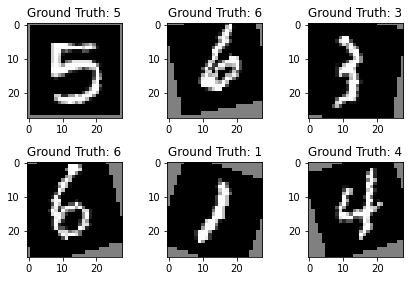

In [9]:
inputs, classes = next(iter(train_loader))
inputs = inputs[:6]
inputs = [el[0] for el in inputs]
classes = classes[:6]

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(denorm(inputs[i]), cmap='gray', interpolation='none');
    plt.title("Ground Truth: {}".format(classes[i]))
    # plt.xticks([])
    # plt.yticks([])
    
plt.tight_layout()
plt.show()

In [10]:
IMAGE_SIZE = 784
# HIDDEN_SIZE = 256
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [57]:
from modules.mnist_classifier import train
from modules.mnist_models import CNN, CNN2, CNN3

In [12]:
import math
NUM_BATCHES = math.ceil(len(train_loader.dataset)/train_loader.batch_size)

In [13]:
# NUM_BATCHES

In [99]:
classifier = CNN3().to(device=device)
loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 100

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.0003

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__1_9'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

#### OneCycleLR Scheduler Parameters:

**max_lr** is the maximum learning rate of OneCycleLR. To be exact, the learning rate will increate from **max_lr** / **div_factor** to **max_lr** in the first **pct_start** * **total_steps** steps, and decrease smoothly to **max_lr** / **final_div_factor** then. div_factor -- Default: 25

**final_div_factor** (float) – Determines the minimum learning rate via min_lr = initial_lr/final_div_factor Default: 1e4

In [405]:
# max_lr/25

In [406]:
# len(train_loader.dataset)/train_loader.batch_size

In [407]:
# # optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9) # Wrapped optimizer
# # scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.9,total_steps=EPOCHS * BATCHES)
# # NUM_EPOCHS = 10
# # learning_rate = 0.0001
# # NUM_BATCHES = math.ceil(len(train_loader.dataset)/train_loader.batch_size)
# # optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)
# # max_lr = 0.0003
# # scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)
# lrs = []
# steps = []
# for epoch in range(NUM_EPOCHS):
#     for batch in range(NUM_BATCHES):
#         scheduler.step()
#         lrs.append(scheduler.get_last_lr()[0])
#         steps.append(epoch * NUM_BATCHES + batch)

# plt.figure()
# plt.legend()
# plt.plot(steps, lrs, label='OneCycle')
# plt.show()

test cnn

In [92]:
classifier.eval;
img = torch.rand(32, 1, 28, 28)  #image 28 on 28 with 1 chanel like in mnist
# img, label = train_dataset[0]
print(img.size())
print('the size of output model to check the output:', classifier(img).size())


torch.Size([32, 1, 28, 28])
the size of output model to check the output: torch.Size([32, 10])


In [93]:
from modules.mnist_models import CNNClassifierWrapper

In [94]:
CNN_wrapper = CNNClassifierWrapper(classifier)

In [95]:
# classifier.eval;
img = torch.rand(32, 1, 28, 28)  #image 28 on 28 with 1 chanel like in mnist
# img, label = train_dataset[0]
print(img.size())
# print('the size of output model to check the output:', classifier(img).size())
CNN_wrapper.get_nth_layer_result(img).size()

torch.Size([32, 1, 28, 28])


torch.Size([32, 512, 1, 1])

### TRAIN

In [409]:
train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

  1%|█▋                                                                                                                                                                  | 1/100 [01:52<3:04:52, 112.04s/it]

epoch [0/100], average classifier_loss: train -- 1.7839, test -- 0.8424 , average classifier_accuracy: train -- 39.3267, test -- 79.3800


  3%|████▉                                                                                                                                                               | 3/100 [05:26<2:54:19, 107.83s/it]

epoch [2/100], average classifier_loss: train -- 0.9440, test -- 0.3462 , average classifier_accuracy: train -- 70.0167, test -- 91.0100


  5%|████████▏                                                                                                                                                           | 5/100 [08:53<2:46:35, 105.21s/it]

epoch [4/100], average classifier_loss: train -- 0.6360, test -- 0.1970 , average classifier_accuracy: train -- 80.0683, test -- 94.9800


  7%|███████████▍                                                                                                                                                        | 7/100 [12:20<2:41:34, 104.25s/it]

epoch [6/100], average classifier_loss: train -- 0.5008, test -- 0.1436 , average classifier_accuracy: train -- 84.4033, test -- 96.1500


  9%|██████████████▊                                                                                                                                                     | 9/100 [15:47<2:37:25, 103.80s/it]

epoch [8/100], average classifier_loss: train -- 0.4328, test -- 0.1220 , average classifier_accuracy: train -- 86.7333, test -- 96.6600


 11%|█████████████████▉                                                                                                                                                 | 11/100 [19:15<2:34:18, 104.02s/it]

epoch [10/100], average classifier_loss: train -- 0.3792, test -- 0.0974 , average classifier_accuracy: train -- 88.4400, test -- 97.1600


 13%|█████████████████████▏                                                                                                                                             | 13/100 [22:42<2:30:32, 103.82s/it]

epoch [12/100], average classifier_loss: train -- 0.3413, test -- 0.0870 , average classifier_accuracy: train -- 89.5000, test -- 97.3600


 15%|████████████████████████▍                                                                                                                                          | 15/100 [26:09<2:26:51, 103.66s/it]

epoch [14/100], average classifier_loss: train -- 0.3118, test -- 0.0812 , average classifier_accuracy: train -- 90.3400, test -- 97.6800


 17%|███████████████████████████▋                                                                                                                                       | 17/100 [29:36<2:23:05, 103.44s/it]

epoch [16/100], average classifier_loss: train -- 0.2908, test -- 0.0744 , average classifier_accuracy: train -- 91.0950, test -- 97.7100


 19%|██████████████████████████████▉                                                                                                                                    | 19/100 [33:03<2:19:51, 103.60s/it]

epoch [18/100], average classifier_loss: train -- 0.2773, test -- 0.0683 , average classifier_accuracy: train -- 91.4050, test -- 97.9700


 21%|██████████████████████████████████▏                                                                                                                                | 21/100 [36:32<2:16:39, 103.79s/it]

epoch [20/100], average classifier_loss: train -- 0.2631, test -- 0.0666 , average classifier_accuracy: train -- 91.8100, test -- 97.8800


 23%|█████████████████████████████████████▍                                                                                                                             | 23/100 [40:00<2:13:20, 103.91s/it]

epoch [22/100], average classifier_loss: train -- 0.2452, test -- 0.0617 , average classifier_accuracy: train -- 92.4433, test -- 98.2600


 25%|████████████████████████████████████████▊                                                                                                                          | 25/100 [43:27<2:09:48, 103.85s/it]

epoch [24/100], average classifier_loss: train -- 0.2336, test -- 0.0611 , average classifier_accuracy: train -- 92.7883, test -- 98.1900


 27%|████████████████████████████████████████████                                                                                                                       | 27/100 [46:59<2:07:59, 105.20s/it]

epoch [26/100], average classifier_loss: train -- 0.2309, test -- 0.0548 , average classifier_accuracy: train -- 92.9417, test -- 98.3700


 29%|███████████████████████████████████████████████▎                                                                                                                   | 29/100 [50:41<2:08:00, 108.18s/it]

epoch [28/100], average classifier_loss: train -- 0.2185, test -- 0.0541 , average classifier_accuracy: train -- 93.3650, test -- 98.3900


 31%|██████████████████████████████████████████████████▌                                                                                                                | 31/100 [54:17<2:04:14, 108.03s/it]

epoch [30/100], average classifier_loss: train -- 0.2100, test -- 0.0527 , average classifier_accuracy: train -- 93.5400, test -- 98.3500


 33%|█████████████████████████████████████████████████████▊                                                                                                             | 33/100 [57:47<1:58:49, 106.41s/it]

epoch [32/100], average classifier_loss: train -- 0.2042, test -- 0.0510 , average classifier_accuracy: train -- 93.7417, test -- 98.4700


 35%|████████████████████████████████████████████████████████▎                                                                                                        | 35/100 [1:01:14<1:53:44, 104.99s/it]

epoch [34/100], average classifier_loss: train -- 0.1965, test -- 0.0480 , average classifier_accuracy: train -- 93.9217, test -- 98.6000


 37%|███████████████████████████████████████████████████████████▌                                                                                                     | 37/100 [1:04:42<1:49:43, 104.50s/it]

epoch [36/100], average classifier_loss: train -- 0.1910, test -- 0.0468 , average classifier_accuracy: train -- 94.0567, test -- 98.5200


 39%|██████████████████████████████████████████████████████████████▊                                                                                                  | 39/100 [1:08:10<1:46:06, 104.37s/it]

epoch [38/100], average classifier_loss: train -- 0.1837, test -- 0.0430 , average classifier_accuracy: train -- 94.3633, test -- 98.6600


 41%|██████████████████████████████████████████████████████████████████                                                                                               | 41/100 [1:11:39<1:42:32, 104.28s/it]

epoch [40/100], average classifier_loss: train -- 0.1832, test -- 0.0433 , average classifier_accuracy: train -- 94.2467, test -- 98.7100


 43%|█████████████████████████████████████████████████████████████████████▏                                                                                           | 43/100 [1:15:13<1:40:36, 105.91s/it]

epoch [42/100], average classifier_loss: train -- 0.1756, test -- 0.0430 , average classifier_accuracy: train -- 94.4383, test -- 98.6300


 45%|████████████████████████████████████████████████████████████████████████▍                                                                                        | 45/100 [1:18:43<1:36:29, 105.27s/it]

epoch [44/100], average classifier_loss: train -- 0.1748, test -- 0.0412 , average classifier_accuracy: train -- 94.4700, test -- 98.6600


 47%|███████████████████████████████████████████████████████████████████████████▋                                                                                     | 47/100 [1:22:12<1:32:32, 104.76s/it]

epoch [46/100], average classifier_loss: train -- 0.1689, test -- 0.0407 , average classifier_accuracy: train -- 94.8067, test -- 98.7200


 49%|██████████████████████████████████████████████████████████████████████████████▉                                                                                  | 49/100 [1:25:40<1:28:47, 104.47s/it]

epoch [48/100], average classifier_loss: train -- 0.1649, test -- 0.0375 , average classifier_accuracy: train -- 94.8300, test -- 98.8400


 51%|██████████████████████████████████████████████████████████████████████████████████                                                                               | 51/100 [1:29:09<1:25:16, 104.43s/it]

epoch [50/100], average classifier_loss: train -- 0.1596, test -- 0.0385 , average classifier_accuracy: train -- 95.1000, test -- 98.7700


 53%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 53/100 [1:32:37<1:21:44, 104.36s/it]

epoch [52/100], average classifier_loss: train -- 0.1592, test -- 0.0406 , average classifier_accuracy: train -- 95.1033, test -- 98.7400


 55%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 55/100 [1:36:07<1:18:29, 104.65s/it]

epoch [54/100], average classifier_loss: train -- 0.1582, test -- 0.0365 , average classifier_accuracy: train -- 95.0000, test -- 98.7900


 57%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 57/100 [1:39:35<1:14:44, 104.30s/it]

epoch [56/100], average classifier_loss: train -- 0.1570, test -- 0.0365 , average classifier_accuracy: train -- 95.1117, test -- 98.8500


 59%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 59/100 [1:43:03<1:11:04, 104.02s/it]

epoch [58/100], average classifier_loss: train -- 0.1516, test -- 0.0354 , average classifier_accuracy: train -- 95.2583, test -- 98.8600


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 61/100 [1:46:30<1:07:30, 103.86s/it]

epoch [60/100], average classifier_loss: train -- 0.1519, test -- 0.0350 , average classifier_accuracy: train -- 95.2400, test -- 98.9000


 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 63/100 [1:49:57<1:03:54, 103.62s/it]

epoch [62/100], average classifier_loss: train -- 0.1437, test -- 0.0335 , average classifier_accuracy: train -- 95.5050, test -- 98.9000


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 65/100 [1:53:25<1:00:33, 103.81s/it]

epoch [64/100], average classifier_loss: train -- 0.1444, test -- 0.0328 , average classifier_accuracy: train -- 95.4883, test -- 98.9500


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 67/100 [1:56:53<57:07, 103.87s/it]

epoch [66/100], average classifier_loss: train -- 0.1398, test -- 0.0336 , average classifier_accuracy: train -- 95.6200, test -- 98.8600


 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 69/100 [2:00:20<53:33, 103.68s/it]

epoch [68/100], average classifier_loss: train -- 0.1403, test -- 0.0325 , average classifier_accuracy: train -- 95.6083, test -- 98.9400


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 71/100 [2:03:47<50:05, 103.64s/it]

epoch [70/100], average classifier_loss: train -- 0.1384, test -- 0.0317 , average classifier_accuracy: train -- 95.6500, test -- 98.9300


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 73/100 [2:07:15<46:42, 103.80s/it]

epoch [72/100], average classifier_loss: train -- 0.1354, test -- 0.0314 , average classifier_accuracy: train -- 95.7700, test -- 98.9400


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 75/100 [2:10:45<43:30, 104.42s/it]

epoch [74/100], average classifier_loss: train -- 0.1344, test -- 0.0314 , average classifier_accuracy: train -- 95.7683, test -- 98.8700


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 77/100 [2:14:12<39:52, 104.02s/it]

epoch [76/100], average classifier_loss: train -- 0.1292, test -- 0.0306 , average classifier_accuracy: train -- 95.9517, test -- 98.9800


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 79/100 [2:17:56<37:59, 108.56s/it]

epoch [78/100], average classifier_loss: train -- 0.1296, test -- 0.0298 , average classifier_accuracy: train -- 95.9617, test -- 99.0300


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 81/100 [2:22:07<37:01, 116.94s/it]

epoch [80/100], average classifier_loss: train -- 0.1286, test -- 0.0290 , average classifier_accuracy: train -- 95.9933, test -- 99.0700


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 83/100 [2:25:44<32:05, 113.26s/it]

epoch [82/100], average classifier_loss: train -- 0.1267, test -- 0.0282 , average classifier_accuracy: train -- 95.9933, test -- 99.0700


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 85/100 [2:29:19<27:31, 110.08s/it]

epoch [84/100], average classifier_loss: train -- 0.1241, test -- 0.0284 , average classifier_accuracy: train -- 96.1267, test -- 99.0100


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 87/100 [2:32:47<23:10, 106.96s/it]

epoch [86/100], average classifier_loss: train -- 0.1239, test -- 0.0295 , average classifier_accuracy: train -- 96.0917, test -- 99.0500


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 89/100 [2:36:13<19:15, 105.01s/it]

epoch [88/100], average classifier_loss: train -- 0.1234, test -- 0.0272 , average classifier_accuracy: train -- 96.0700, test -- 99.0900


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 91/100 [2:39:41<15:39, 104.36s/it]

epoch [90/100], average classifier_loss: train -- 0.1194, test -- 0.0273 , average classifier_accuracy: train -- 96.2250, test -- 99.1000


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 93/100 [2:43:09<12:09, 104.27s/it]

epoch [92/100], average classifier_loss: train -- 0.1190, test -- 0.0275 , average classifier_accuracy: train -- 96.3833, test -- 99.0600


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 95/100 [2:46:37<08:39, 104.00s/it]

epoch [94/100], average classifier_loss: train -- 0.1190, test -- 0.0271 , average classifier_accuracy: train -- 96.2267, test -- 99.0700


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 97/100 [2:50:06<05:12, 104.33s/it]

epoch [96/100], average classifier_loss: train -- 0.1166, test -- 0.0268 , average classifier_accuracy: train -- 96.3283, test -- 99.1000


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 99/100 [2:53:34<01:44, 104.06s/it]

epoch [98/100], average classifier_loss: train -- 0.1153, test -- 0.0261 , average classifier_accuracy: train -- 96.3483, test -- 99.1200


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [2:55:18<00:00, 105.18s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__1_7/classifier_model.pt


In [101]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 10

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.001

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN3__1_9_2'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN3__1_9_2' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:14<20:11, 134.65s/it]

epoch [0/10], average classifier_loss: train -- 0.1152, test -- 0.0283 , average classifier_accuracy: train -- 96.3550, test -- 99.0100


 30%|██████████████████████████████████████████████████                                                                                                                     | 3/10 [07:11<17:02, 146.13s/it]

epoch [2/10], average classifier_loss: train -- 0.1061, test -- 0.0258 , average classifier_accuracy: train -- 96.6750, test -- 99.1000


 50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 5/10 [12:36<13:01, 156.34s/it]

epoch [4/10], average classifier_loss: train -- 0.0942, test -- 0.0273 , average classifier_accuracy: train -- 97.0567, test -- 99.0700


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 7/10 [18:22<08:17, 165.85s/it]

epoch [6/10], average classifier_loss: train -- 0.0921, test -- 0.0271 , average classifier_accuracy: train -- 97.0850, test -- 98.9800


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 9/10 [24:02<02:46, 166.81s/it]

epoch [8/10], average classifier_loss: train -- 0.0867, test -- 0.0241 , average classifier_accuracy: train -- 97.2567, test -- 99.1900


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [26:15<00:00, 157.56s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_2/classifier_model.pt


In [102]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 10

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.001

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN3__1_9_16'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN3__1_9_3' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:12<19:52, 132.46s/it]

epoch [0/10], average classifier_loss: train -- 0.0849, test -- 0.0219 , average classifier_accuracy: train -- 97.3250, test -- 99.2400


 30%|██████████████████████████████████████████████████                                                                                                                     | 3/10 [06:37<15:27, 132.45s/it]

epoch [2/10], average classifier_loss: train -- 0.0777, test -- 0.0203 , average classifier_accuracy: train -- 97.5783, test -- 99.2600


 50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 5/10 [11:04<11:05, 133.05s/it]

epoch [4/10], average classifier_loss: train -- 0.0725, test -- 0.0226 , average classifier_accuracy: train -- 97.7450, test -- 99.1600


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 7/10 [15:30<06:39, 133.13s/it]

epoch [6/10], average classifier_loss: train -- 0.0724, test -- 0.0219 , average classifier_accuracy: train -- 97.6900, test -- 99.2400


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 9/10 [20:33<02:22, 142.05s/it]

epoch [8/10], average classifier_loss: train -- 0.0705, test -- 0.0230 , average classifier_accuracy: train -- 97.7233, test -- 99.1500


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [22:57<00:00, 137.76s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_3/classifier_model.pt


In [118]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()
for i in range(10):
    learning_rate = 0.00003
    NUM_EPOCHS = 10

    optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

    max_lr = 0.0001

    save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
    NAME = f'classifier__CNN3__1_9_{i+25}'

    scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

    # NUM_EPOCHS * len(train_loader)

    train(
        num_epochs = NUM_EPOCHS,
        train_loader = train_loader,
        test_loader = test_loader,
        classifier = classifier,
        optimizer = optimizer,
        criterion = loss_function,
        device = device,
        name = NAME, 
        save_path = save_path,
        plot_process = True,
        info_n = 5,
        scheduler = scheduler,
        save_model_name = 'classifier_model.pt'

        # scheduler_D = scheduler_D,
        # scheduler_G = scheduler_G
    )

 10%|████████████████▋                                                                                                                                                      | 1/10 [02:11<19:39, 131.00s/it]

epoch [0/10], average classifier_loss: train -- 0.0258, test -- 0.0120 , average classifier_accuracy: train -- 99.1300, test -- 99.5700


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 6/10 [12:35<08:21, 125.29s/it]

epoch [5/10], average classifier_loss: train -- 0.0240, test -- 0.0116 , average classifier_accuracy: train -- 99.2500, test -- 99.5800


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [20:57<00:00, 125.79s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_25/classifier_model.pt
Folder 'classifier__CNN3__1_9_26' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:04<18:43, 124.84s/it]

epoch [0/10], average classifier_loss: train -- 0.0225, test -- 0.0116 , average classifier_accuracy: train -- 99.2850, test -- 99.5300


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 6/10 [12:34<08:25, 126.30s/it]

epoch [5/10], average classifier_loss: train -- 0.0233, test -- 0.0108 , average classifier_accuracy: train -- 99.2433, test -- 99.6000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [20:54<00:00, 125.43s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_26/classifier_model.pt
Folder 'classifier__CNN3__1_9_27' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:05<18:51, 125.68s/it]

epoch [0/10], average classifier_loss: train -- 0.0246, test -- 0.0109 , average classifier_accuracy: train -- 99.2117, test -- 99.5900


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 6/10 [12:37<08:24, 126.11s/it]

epoch [5/10], average classifier_loss: train -- 0.0220, test -- 0.0105 , average classifier_accuracy: train -- 99.3317, test -- 99.6200


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [21:00<00:00, 126.03s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_27/classifier_model.pt
Folder 'classifier__CNN3__1_9_28' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:07<19:11, 127.89s/it]

epoch [0/10], average classifier_loss: train -- 0.0230, test -- 0.0104 , average classifier_accuracy: train -- 99.2733, test -- 99.6200


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 6/10 [12:39<08:24, 126.21s/it]

epoch [5/10], average classifier_loss: train -- 0.0222, test -- 0.0108 , average classifier_accuracy: train -- 99.2667, test -- 99.6200


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [21:04<00:00, 126.49s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_28/classifier_model.pt
Folder 'classifier__CNN3__1_9_29' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:06<18:55, 126.15s/it]

epoch [0/10], average classifier_loss: train -- 0.0222, test -- 0.0104 , average classifier_accuracy: train -- 99.2833, test -- 99.6100


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 6/10 [12:36<08:24, 126.13s/it]

epoch [5/10], average classifier_loss: train -- 0.0217, test -- 0.0105 , average classifier_accuracy: train -- 99.2917, test -- 99.6000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [20:57<00:00, 125.77s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_29/classifier_model.pt
Folder 'classifier__CNN3__1_9_30' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:05<18:46, 125.19s/it]

epoch [0/10], average classifier_loss: train -- 0.0221, test -- 0.0108 , average classifier_accuracy: train -- 99.2933, test -- 99.5800


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 6/10 [12:32<08:21, 125.30s/it]

epoch [5/10], average classifier_loss: train -- 0.0227, test -- 0.0108 , average classifier_accuracy: train -- 99.2867, test -- 99.6100


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [20:55<00:00, 125.54s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_30/classifier_model.pt
Folder 'classifier__CNN3__1_9_31' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:04<18:44, 124.99s/it]

epoch [0/10], average classifier_loss: train -- 0.0220, test -- 0.0111 , average classifier_accuracy: train -- 99.2717, test -- 99.5900


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 6/10 [12:30<08:20, 125.23s/it]

epoch [5/10], average classifier_loss: train -- 0.0217, test -- 0.0108 , average classifier_accuracy: train -- 99.2967, test -- 99.6000


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [20:55<00:00, 125.52s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_31/classifier_model.pt
Folder 'classifier__CNN3__1_9_32' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:05<18:49, 125.50s/it]

epoch [0/10], average classifier_loss: train -- 0.0210, test -- 0.0109 , average classifier_accuracy: train -- 99.3083, test -- 99.5900


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 6/10 [12:32<08:21, 125.38s/it]

epoch [5/10], average classifier_loss: train -- 0.0215, test -- 0.0108 , average classifier_accuracy: train -- 99.2850, test -- 99.6100


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [20:51<00:00, 125.13s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_32/classifier_model.pt
Folder 'classifier__CNN3__1_9_33' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:04<18:44, 124.97s/it]

epoch [0/10], average classifier_loss: train -- 0.0224, test -- 0.0107 , average classifier_accuracy: train -- 99.2333, test -- 99.5900


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 6/10 [12:33<08:22, 125.52s/it]

epoch [5/10], average classifier_loss: train -- 0.0213, test -- 0.0106 , average classifier_accuracy: train -- 99.2883, test -- 99.5900


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [20:54<00:00, 125.44s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_33/classifier_model.pt
Folder 'classifier__CNN3__1_9_34' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:04<18:43, 124.86s/it]

epoch [0/10], average classifier_loss: train -- 0.0220, test -- 0.0111 , average classifier_accuracy: train -- 99.3050, test -- 99.6000


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 6/10 [12:29<08:19, 124.91s/it]

epoch [5/10], average classifier_loss: train -- 0.0225, test -- 0.0107 , average classifier_accuracy: train -- 99.2817, test -- 99.5900


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [20:52<00:00, 125.29s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_34/classifier_model.pt


In [104]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 10

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.001

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN3__1_9_5'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN3__1_9_5' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:22<21:23, 142.58s/it]

epoch [0/10], average classifier_loss: train -- 0.0595, test -- 0.0184 , average classifier_accuracy: train -- 98.1250, test -- 99.3800


 30%|██████████████████████████████████████████████████                                                                                                                     | 3/10 [07:08<16:40, 142.96s/it]

epoch [2/10], average classifier_loss: train -- 0.0603, test -- 0.0186 , average classifier_accuracy: train -- 98.0417, test -- 99.4100


 50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 5/10 [11:58<11:59, 143.91s/it]

epoch [4/10], average classifier_loss: train -- 0.0562, test -- 0.0168 , average classifier_accuracy: train -- 98.2150, test -- 99.4100


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 7/10 [16:44<07:09, 143.33s/it]

epoch [6/10], average classifier_loss: train -- 0.0542, test -- 0.0195 , average classifier_accuracy: train -- 98.2467, test -- 99.2900


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 9/10 [21:29<02:23, 143.05s/it]

epoch [8/10], average classifier_loss: train -- 0.0561, test -- 0.0189 , average classifier_accuracy: train -- 98.1783, test -- 99.3800


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [23:52<00:00, 143.30s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_5/classifier_model.pt


In [105]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 10

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.001

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN3__1_9_6'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN3__1_9_6' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:25<21:51, 145.67s/it]

epoch [0/10], average classifier_loss: train -- 0.0550, test -- 0.0164 , average classifier_accuracy: train -- 98.2883, test -- 99.4400


 30%|██████████████████████████████████████████████████                                                                                                                     | 3/10 [07:10<16:42, 143.14s/it]

epoch [2/10], average classifier_loss: train -- 0.0535, test -- 0.0173 , average classifier_accuracy: train -- 98.2833, test -- 99.4100


 50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 5/10 [11:55<11:53, 142.68s/it]

epoch [4/10], average classifier_loss: train -- 0.0524, test -- 0.0169 , average classifier_accuracy: train -- 98.3200, test -- 99.3900


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 7/10 [16:41<07:09, 143.19s/it]

epoch [6/10], average classifier_loss: train -- 0.0538, test -- 0.0165 , average classifier_accuracy: train -- 98.3083, test -- 99.4100


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 9/10 [21:16<02:19, 139.55s/it]

epoch [8/10], average classifier_loss: train -- 0.0500, test -- 0.0171 , average classifier_accuracy: train -- 98.3933, test -- 99.4400


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [23:22<00:00, 140.23s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_6/classifier_model.pt


In [106]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 10

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.001

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN3__1_9_7'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN3__1_9_7' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:04<18:41, 124.65s/it]

epoch [0/10], average classifier_loss: train -- 0.0512, test -- 0.0171 , average classifier_accuracy: train -- 98.4250, test -- 99.3400


 30%|██████████████████████████████████████████████████                                                                                                                     | 3/10 [06:14<14:33, 124.74s/it]

epoch [2/10], average classifier_loss: train -- 0.0500, test -- 0.0172 , average classifier_accuracy: train -- 98.3933, test -- 99.4200


 50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 5/10 [10:25<10:27, 125.48s/it]

epoch [4/10], average classifier_loss: train -- 0.0476, test -- 0.0159 , average classifier_accuracy: train -- 98.4983, test -- 99.4400


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 7/10 [14:36<06:15, 125.33s/it]

epoch [6/10], average classifier_loss: train -- 0.0486, test -- 0.0156 , average classifier_accuracy: train -- 98.5033, test -- 99.4200


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 9/10 [18:46<02:05, 125.23s/it]

epoch [8/10], average classifier_loss: train -- 0.0464, test -- 0.0153 , average classifier_accuracy: train -- 98.5583, test -- 99.4500


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [20:51<00:00, 125.12s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_7/classifier_model.pt


In [107]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 10

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.001

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN3__1_9_8'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN3__1_9_8' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:05<18:51, 125.74s/it]

epoch [0/10], average classifier_loss: train -- 0.0467, test -- 0.0154 , average classifier_accuracy: train -- 98.5167, test -- 99.4400


 30%|██████████████████████████████████████████████████                                                                                                                     | 3/10 [06:19<14:46, 126.64s/it]

epoch [2/10], average classifier_loss: train -- 0.0481, test -- 0.0154 , average classifier_accuracy: train -- 98.4600, test -- 99.5000


 50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 5/10 [10:31<10:30, 126.12s/it]

epoch [4/10], average classifier_loss: train -- 0.0461, test -- 0.0165 , average classifier_accuracy: train -- 98.5233, test -- 99.4500


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 7/10 [14:44<06:18, 126.13s/it]

epoch [6/10], average classifier_loss: train -- 0.0439, test -- 0.0162 , average classifier_accuracy: train -- 98.6133, test -- 99.4800


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 9/10 [18:54<02:05, 125.59s/it]

epoch [8/10], average classifier_loss: train -- 0.0454, test -- 0.0162 , average classifier_accuracy: train -- 98.5533, test -- 99.4800


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [21:00<00:00, 126.09s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_8/classifier_model.pt


In [108]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 10

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.001

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN3__1_9_9'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN3__1_9_9' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:05<18:48, 125.41s/it]

epoch [0/10], average classifier_loss: train -- 0.0449, test -- 0.0179 , average classifier_accuracy: train -- 98.5517, test -- 99.3800


 30%|██████████████████████████████████████████████████                                                                                                                     | 3/10 [06:15<14:36, 125.17s/it]

epoch [2/10], average classifier_loss: train -- 0.0449, test -- 0.0156 , average classifier_accuracy: train -- 98.5850, test -- 99.4700


 50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 5/10 [10:25<10:24, 124.94s/it]

epoch [4/10], average classifier_loss: train -- 0.0436, test -- 0.0157 , average classifier_accuracy: train -- 98.6050, test -- 99.4000


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 7/10 [14:38<06:18, 126.06s/it]

epoch [6/10], average classifier_loss: train -- 0.0433, test -- 0.0138 , average classifier_accuracy: train -- 98.6533, test -- 99.5000


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 9/10 [18:48<02:05, 125.57s/it]

epoch [8/10], average classifier_loss: train -- 0.0438, test -- 0.0163 , average classifier_accuracy: train -- 98.6333, test -- 99.4700


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [20:54<00:00, 125.42s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_9/classifier_model.pt


In [109]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 10

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.001

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN3__1_9_10'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN3__1_9_10' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:05<18:48, 125.44s/it]

epoch [0/10], average classifier_loss: train -- 0.0406, test -- 0.0146 , average classifier_accuracy: train -- 98.6983, test -- 99.4600


 30%|██████████████████████████████████████████████████                                                                                                                     | 3/10 [06:17<14:41, 125.91s/it]

epoch [2/10], average classifier_loss: train -- 0.0421, test -- 0.0140 , average classifier_accuracy: train -- 98.6400, test -- 99.4600


 50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 5/10 [10:31<10:32, 126.40s/it]

epoch [4/10], average classifier_loss: train -- 0.0411, test -- 0.0151 , average classifier_accuracy: train -- 98.7050, test -- 99.4400


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 7/10 [14:44<06:19, 126.36s/it]

epoch [6/10], average classifier_loss: train -- 0.0419, test -- 0.0141 , average classifier_accuracy: train -- 98.6300, test -- 99.4300


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 9/10 [18:56<02:06, 126.17s/it]

epoch [8/10], average classifier_loss: train -- 0.0409, test -- 0.0149 , average classifier_accuracy: train -- 98.6967, test -- 99.4400


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [21:01<00:00, 126.16s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_10/classifier_model.pt


In [110]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 10

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.001

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN3__1_9_11'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN3__1_9_11' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:05<18:49, 125.55s/it]

epoch [0/10], average classifier_loss: train -- 0.0414, test -- 0.0124 , average classifier_accuracy: train -- 98.6983, test -- 99.5700


 30%|██████████████████████████████████████████████████                                                                                                                     | 3/10 [06:18<14:41, 125.97s/it]

epoch [2/10], average classifier_loss: train -- 0.0410, test -- 0.0147 , average classifier_accuracy: train -- 98.6617, test -- 99.4400


 50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 5/10 [10:28<10:27, 125.58s/it]

epoch [4/10], average classifier_loss: train -- 0.0407, test -- 0.0136 , average classifier_accuracy: train -- 98.7383, test -- 99.5100


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 7/10 [14:40<06:17, 125.83s/it]

epoch [6/10], average classifier_loss: train -- 0.0406, test -- 0.0146 , average classifier_accuracy: train -- 98.6900, test -- 99.4900


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 9/10 [18:53<02:06, 126.32s/it]

epoch [8/10], average classifier_loss: train -- 0.0400, test -- 0.0146 , average classifier_accuracy: train -- 98.7567, test -- 99.4300


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [20:58<00:00, 125.88s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_11/classifier_model.pt


In [111]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 10

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.001

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN3__1_9_12'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN3__1_9_12' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:05<18:45, 125.04s/it]

epoch [0/10], average classifier_loss: train -- 0.0393, test -- 0.0164 , average classifier_accuracy: train -- 98.7567, test -- 99.4400


 30%|██████████████████████████████████████████████████                                                                                                                     | 3/10 [06:15<14:37, 125.30s/it]

epoch [2/10], average classifier_loss: train -- 0.0387, test -- 0.0133 , average classifier_accuracy: train -- 98.7717, test -- 99.4800


 50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 5/10 [10:25<10:25, 125.08s/it]

epoch [4/10], average classifier_loss: train -- 0.0383, test -- 0.0147 , average classifier_accuracy: train -- 98.7767, test -- 99.5000


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 7/10 [14:39<06:18, 126.26s/it]

epoch [6/10], average classifier_loss: train -- 0.0368, test -- 0.0128 , average classifier_accuracy: train -- 98.8417, test -- 99.5400


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 9/10 [18:50<02:05, 125.77s/it]

epoch [8/10], average classifier_loss: train -- 0.0369, test -- 0.0148 , average classifier_accuracy: train -- 98.8667, test -- 99.5200


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [20:55<00:00, 125.56s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_12/classifier_model.pt


In [112]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 10

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.001

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN3__1_9_13'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN3__1_9_13' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:06<18:54, 126.07s/it]

epoch [0/10], average classifier_loss: train -- 0.0376, test -- 0.0129 , average classifier_accuracy: train -- 98.7483, test -- 99.5500


 30%|██████████████████████████████████████████████████                                                                                                                     | 3/10 [06:16<14:37, 125.39s/it]

epoch [2/10], average classifier_loss: train -- 0.0374, test -- 0.0132 , average classifier_accuracy: train -- 98.8183, test -- 99.5500


 50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 5/10 [10:29<10:30, 126.04s/it]

epoch [4/10], average classifier_loss: train -- 0.0381, test -- 0.0132 , average classifier_accuracy: train -- 98.7467, test -- 99.5300


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 7/10 [14:41<06:17, 125.81s/it]

epoch [6/10], average classifier_loss: train -- 0.0369, test -- 0.0141 , average classifier_accuracy: train -- 98.8117, test -- 99.5200


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 9/10 [18:51<02:05, 125.51s/it]

epoch [8/10], average classifier_loss: train -- 0.0356, test -- 0.0124 , average classifier_accuracy: train -- 98.9250, test -- 99.5300


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [20:56<00:00, 125.67s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_13/classifier_model.pt


In [113]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 10

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.001

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN3__1_9_14'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN3__1_9_14' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:06<18:59, 126.64s/it]

epoch [0/10], average classifier_loss: train -- 0.0374, test -- 0.0147 , average classifier_accuracy: train -- 98.7833, test -- 99.5500


 30%|██████████████████████████████████████████████████                                                                                                                     | 3/10 [06:17<14:39, 125.65s/it]

epoch [2/10], average classifier_loss: train -- 0.0365, test -- 0.0131 , average classifier_accuracy: train -- 98.8267, test -- 99.5100


 50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 5/10 [10:27<10:25, 125.16s/it]

epoch [4/10], average classifier_loss: train -- 0.0371, test -- 0.0156 , average classifier_accuracy: train -- 98.8283, test -- 99.4500


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 7/10 [14:37<06:15, 125.07s/it]

epoch [6/10], average classifier_loss: train -- 0.0345, test -- 0.0137 , average classifier_accuracy: train -- 98.9000, test -- 99.4700


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 9/10 [18:50<02:06, 126.01s/it]

epoch [8/10], average classifier_loss: train -- 0.0359, test -- 0.0131 , average classifier_accuracy: train -- 98.8383, test -- 99.5100


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [20:55<00:00, 125.55s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_14/classifier_model.pt


In [114]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 10

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.001

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN3__1_9_15'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN3__1_9_15' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


 10%|████████████████▋                                                                                                                                                      | 1/10 [02:05<18:47, 125.32s/it]

epoch [0/10], average classifier_loss: train -- 0.0338, test -- 0.0128 , average classifier_accuracy: train -- 98.8883, test -- 99.5300


 30%|██████████████████████████████████████████████████                                                                                                                     | 3/10 [06:16<14:38, 125.48s/it]

epoch [2/10], average classifier_loss: train -- 0.0348, test -- 0.0134 , average classifier_accuracy: train -- 98.9017, test -- 99.4500


 50%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                   | 5/10 [10:26<10:25, 125.15s/it]

epoch [4/10], average classifier_loss: train -- 0.0363, test -- 0.0128 , average classifier_accuracy: train -- 98.8267, test -- 99.5500


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 7/10 [14:38<06:16, 125.48s/it]

epoch [6/10], average classifier_loss: train -- 0.0348, test -- 0.0133 , average classifier_accuracy: train -- 98.8600, test -- 99.5200


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 9/10 [18:47<02:05, 125.03s/it]

epoch [8/10], average classifier_loss: train -- 0.0345, test -- 0.0134 , average classifier_accuracy: train -- 98.8650, test -- 99.4800


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [20:52<00:00, 125.21s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN3__1_9_15/classifier_model.pt


In [415]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 100

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.0005

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN2__1_8_5'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN2__1_8_5' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


  1%|█▋                                                                                                                                                                  | 1/100 [01:46<2:54:56, 106.03s/it]

epoch [0/100], average classifier_loss: train -- 0.0579, test -- 0.0131 , average classifier_accuracy: train -- 98.0950, test -- 99.5100


  3%|████▉                                                                                                                                                               | 3/100 [05:15<2:49:34, 104.89s/it]

epoch [2/100], average classifier_loss: train -- 0.0594, test -- 0.0132 , average classifier_accuracy: train -- 98.1000, test -- 99.4800


  5%|████████▏                                                                                                                                                           | 5/100 [08:44<2:45:56, 104.81s/it]

epoch [4/100], average classifier_loss: train -- 0.0589, test -- 0.0133 , average classifier_accuracy: train -- 98.1383, test -- 99.5100


  7%|███████████▍                                                                                                                                                        | 7/100 [12:14<2:42:39, 104.94s/it]

epoch [6/100], average classifier_loss: train -- 0.0601, test -- 0.0143 , average classifier_accuracy: train -- 98.1167, test -- 99.4800


  9%|██████████████▊                                                                                                                                                     | 9/100 [15:45<2:39:25, 105.11s/it]

epoch [8/100], average classifier_loss: train -- 0.0574, test -- 0.0125 , average classifier_accuracy: train -- 98.2200, test -- 99.5300


 11%|█████████████████▉                                                                                                                                                 | 11/100 [19:15<2:35:44, 104.99s/it]

epoch [10/100], average classifier_loss: train -- 0.0573, test -- 0.0132 , average classifier_accuracy: train -- 98.1717, test -- 99.5700


 13%|█████████████████████▏                                                                                                                                             | 13/100 [22:44<2:32:07, 104.91s/it]

epoch [12/100], average classifier_loss: train -- 0.0585, test -- 0.0124 , average classifier_accuracy: train -- 98.1000, test -- 99.5000


 15%|████████████████████████▍                                                                                                                                          | 15/100 [26:14<2:28:34, 104.87s/it]

epoch [14/100], average classifier_loss: train -- 0.0577, test -- 0.0128 , average classifier_accuracy: train -- 98.1683, test -- 99.5400


 17%|███████████████████████████▋                                                                                                                                       | 17/100 [29:44<2:25:06, 104.90s/it]

epoch [16/100], average classifier_loss: train -- 0.0586, test -- 0.0126 , average classifier_accuracy: train -- 98.1700, test -- 99.5700


 19%|██████████████████████████████▉                                                                                                                                    | 19/100 [33:16<2:22:09, 105.31s/it]

epoch [18/100], average classifier_loss: train -- 0.0591, test -- 0.0132 , average classifier_accuracy: train -- 98.1050, test -- 99.5500


 21%|██████████████████████████████████▏                                                                                                                                | 21/100 [36:45<2:18:21, 105.08s/it]

epoch [20/100], average classifier_loss: train -- 0.0561, test -- 0.0136 , average classifier_accuracy: train -- 98.2467, test -- 99.5300


 23%|█████████████████████████████████████▍                                                                                                                             | 23/100 [40:16<2:14:53, 105.11s/it]

epoch [22/100], average classifier_loss: train -- 0.0572, test -- 0.0132 , average classifier_accuracy: train -- 98.1617, test -- 99.5100


 25%|████████████████████████████████████████▊                                                                                                                          | 25/100 [43:46<2:11:25, 105.15s/it]

epoch [24/100], average classifier_loss: train -- 0.0549, test -- 0.0132 , average classifier_accuracy: train -- 98.3050, test -- 99.5700


 27%|████████████████████████████████████████████                                                                                                                       | 27/100 [47:17<2:08:21, 105.50s/it]

epoch [26/100], average classifier_loss: train -- 0.0586, test -- 0.0137 , average classifier_accuracy: train -- 98.1667, test -- 99.5400


 29%|███████████████████████████████████████████████▎                                                                                                                   | 29/100 [50:48<2:04:45, 105.43s/it]

epoch [28/100], average classifier_loss: train -- 0.0566, test -- 0.0125 , average classifier_accuracy: train -- 98.2133, test -- 99.5800


 31%|██████████████████████████████████████████████████▌                                                                                                                | 31/100 [54:17<2:00:35, 104.86s/it]

epoch [30/100], average classifier_loss: train -- 0.0571, test -- 0.0131 , average classifier_accuracy: train -- 98.1467, test -- 99.5800


 33%|█████████████████████████████████████████████████████▊                                                                                                             | 33/100 [57:46<1:56:56, 104.73s/it]

epoch [32/100], average classifier_loss: train -- 0.0581, test -- 0.0127 , average classifier_accuracy: train -- 98.0900, test -- 99.5700


 35%|████████████████████████████████████████████████████████▎                                                                                                        | 35/100 [1:01:16<1:53:30, 104.77s/it]

epoch [34/100], average classifier_loss: train -- 0.0580, test -- 0.0124 , average classifier_accuracy: train -- 98.1000, test -- 99.5500


 37%|███████████████████████████████████████████████████████████▌                                                                                                     | 37/100 [1:04:46<1:50:17, 105.04s/it]

epoch [36/100], average classifier_loss: train -- 0.0561, test -- 0.0139 , average classifier_accuracy: train -- 98.1850, test -- 99.5300


 39%|██████████████████████████████████████████████████████████████▊                                                                                                  | 39/100 [1:08:17<1:46:51, 105.11s/it]

epoch [38/100], average classifier_loss: train -- 0.0571, test -- 0.0128 , average classifier_accuracy: train -- 98.2283, test -- 99.5500


 41%|██████████████████████████████████████████████████████████████████                                                                                               | 41/100 [1:11:47<1:43:21, 105.11s/it]

epoch [40/100], average classifier_loss: train -- 0.0582, test -- 0.0135 , average classifier_accuracy: train -- 98.1200, test -- 99.5000


 43%|█████████████████████████████████████████████████████████████████████▏                                                                                           | 43/100 [1:15:17<1:39:50, 105.10s/it]

epoch [42/100], average classifier_loss: train -- 0.0578, test -- 0.0126 , average classifier_accuracy: train -- 98.2033, test -- 99.5900


 45%|████████████████████████████████████████████████████████████████████████▍                                                                                        | 45/100 [1:18:48<1:36:31, 105.30s/it]

epoch [44/100], average classifier_loss: train -- 0.0574, test -- 0.0130 , average classifier_accuracy: train -- 98.1650, test -- 99.5700


 47%|███████████████████████████████████████████████████████████████████████████▋                                                                                     | 47/100 [1:22:18<1:32:58, 105.25s/it]

epoch [46/100], average classifier_loss: train -- 0.0580, test -- 0.0139 , average classifier_accuracy: train -- 98.1833, test -- 99.5100


 49%|██████████████████████████████████████████████████████████████████████████████▉                                                                                  | 49/100 [1:25:48<1:29:19, 105.10s/it]

epoch [48/100], average classifier_loss: train -- 0.0577, test -- 0.0132 , average classifier_accuracy: train -- 98.2050, test -- 99.5600


 51%|██████████████████████████████████████████████████████████████████████████████████                                                                               | 51/100 [1:29:19<1:25:58, 105.27s/it]

epoch [50/100], average classifier_loss: train -- 0.0585, test -- 0.0137 , average classifier_accuracy: train -- 98.1183, test -- 99.5300


 53%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 53/100 [1:32:49<1:22:23, 105.17s/it]

epoch [52/100], average classifier_loss: train -- 0.0561, test -- 0.0134 , average classifier_accuracy: train -- 98.1367, test -- 99.5100


 55%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 55/100 [1:36:21<1:19:02, 105.40s/it]

epoch [54/100], average classifier_loss: train -- 0.0580, test -- 0.0135 , average classifier_accuracy: train -- 98.1483, test -- 99.5300


 57%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 57/100 [1:39:50<1:15:17, 105.05s/it]

epoch [56/100], average classifier_loss: train -- 0.0585, test -- 0.0138 , average classifier_accuracy: train -- 98.1083, test -- 99.5500


 59%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 59/100 [1:43:23<1:12:11, 105.65s/it]

epoch [58/100], average classifier_loss: train -- 0.0587, test -- 0.0132 , average classifier_accuracy: train -- 98.1517, test -- 99.5500


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 61/100 [1:46:53<1:08:28, 105.36s/it]

epoch [60/100], average classifier_loss: train -- 0.0560, test -- 0.0138 , average classifier_accuracy: train -- 98.2117, test -- 99.5400


 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 63/100 [1:50:24<1:05:01, 105.46s/it]

epoch [62/100], average classifier_loss: train -- 0.0577, test -- 0.0127 , average classifier_accuracy: train -- 98.1950, test -- 99.5600


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 65/100 [1:53:54<1:01:25, 105.30s/it]

epoch [64/100], average classifier_loss: train -- 0.0568, test -- 0.0131 , average classifier_accuracy: train -- 98.2783, test -- 99.4900


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 67/100 [1:57:25<57:55, 105.33s/it]

epoch [66/100], average classifier_loss: train -- 0.0564, test -- 0.0136 , average classifier_accuracy: train -- 98.2000, test -- 99.5000


 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 69/100 [2:00:56<54:27, 105.39s/it]

epoch [68/100], average classifier_loss: train -- 0.0571, test -- 0.0139 , average classifier_accuracy: train -- 98.1683, test -- 99.4900


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 71/100 [2:04:26<50:54, 105.33s/it]

epoch [70/100], average classifier_loss: train -- 0.0563, test -- 0.0128 , average classifier_accuracy: train -- 98.1867, test -- 99.5600


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 73/100 [2:07:58<47:30, 105.58s/it]

epoch [72/100], average classifier_loss: train -- 0.0560, test -- 0.0125 , average classifier_accuracy: train -- 98.2250, test -- 99.5700


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 75/100 [2:11:29<43:56, 105.48s/it]

epoch [74/100], average classifier_loss: train -- 0.0577, test -- 0.0125 , average classifier_accuracy: train -- 98.1550, test -- 99.5800


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 77/100 [2:14:59<40:23, 105.39s/it]

epoch [76/100], average classifier_loss: train -- 0.0554, test -- 0.0131 , average classifier_accuracy: train -- 98.2183, test -- 99.5600


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 79/100 [2:18:30<36:52, 105.36s/it]

epoch [78/100], average classifier_loss: train -- 0.0558, test -- 0.0129 , average classifier_accuracy: train -- 98.2050, test -- 99.5300


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 81/100 [2:22:01<33:24, 105.48s/it]

epoch [80/100], average classifier_loss: train -- 0.0571, test -- 0.0128 , average classifier_accuracy: train -- 98.2300, test -- 99.6000


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 83/100 [2:25:31<29:48, 105.19s/it]

epoch [82/100], average classifier_loss: train -- 0.0583, test -- 0.0132 , average classifier_accuracy: train -- 98.1483, test -- 99.5300


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 85/100 [2:29:01<26:15, 105.03s/it]

epoch [84/100], average classifier_loss: train -- 0.0575, test -- 0.0143 , average classifier_accuracy: train -- 98.0883, test -- 99.5200


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 87/100 [2:32:31<22:48, 105.24s/it]

epoch [86/100], average classifier_loss: train -- 0.0568, test -- 0.0132 , average classifier_accuracy: train -- 98.2733, test -- 99.5800


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 89/100 [2:36:00<19:12, 104.77s/it]

epoch [88/100], average classifier_loss: train -- 0.0557, test -- 0.0135 , average classifier_accuracy: train -- 98.2100, test -- 99.5300


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 91/100 [2:39:30<15:44, 104.99s/it]

epoch [90/100], average classifier_loss: train -- 0.0567, test -- 0.0129 , average classifier_accuracy: train -- 98.1817, test -- 99.5500


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 93/100 [2:43:00<12:14, 104.96s/it]

epoch [92/100], average classifier_loss: train -- 0.0534, test -- 0.0123 , average classifier_accuracy: train -- 98.2900, test -- 99.5700


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 95/100 [2:46:30<08:44, 104.99s/it]

epoch [94/100], average classifier_loss: train -- 0.0539, test -- 0.0129 , average classifier_accuracy: train -- 98.2617, test -- 99.5800


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 97/100 [2:50:00<05:15, 105.06s/it]

epoch [96/100], average classifier_loss: train -- 0.0569, test -- 0.0124 , average classifier_accuracy: train -- 98.1500, test -- 99.6000


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 99/100 [2:53:32<01:45, 105.41s/it]

epoch [98/100], average classifier_loss: train -- 0.0520, test -- 0.0131 , average classifier_accuracy: train -- 98.3567, test -- 99.5600


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [2:55:18<00:00, 105.19s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN2__1_8_5/classifier_model.pt


In [416]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 100

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.0005

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN2__1_8_6'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN2__1_8_6' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


  1%|█▋                                                                                                                                                                  | 1/100 [01:45<2:53:17, 105.03s/it]

epoch [0/100], average classifier_loss: train -- 0.0544, test -- 0.0128 , average classifier_accuracy: train -- 98.2367, test -- 99.5600


  3%|████▉                                                                                                                                                               | 3/100 [05:15<2:50:14, 105.30s/it]

epoch [2/100], average classifier_loss: train -- 0.0546, test -- 0.0124 , average classifier_accuracy: train -- 98.2150, test -- 99.5400


  5%|████████▏                                                                                                                                                           | 5/100 [08:45<2:46:27, 105.13s/it]

epoch [4/100], average classifier_loss: train -- 0.0536, test -- 0.0127 , average classifier_accuracy: train -- 98.2983, test -- 99.5700


  7%|███████████▍                                                                                                                                                        | 7/100 [12:15<2:42:42, 104.97s/it]

epoch [6/100], average classifier_loss: train -- 0.0559, test -- 0.0130 , average classifier_accuracy: train -- 98.2050, test -- 99.5200


  9%|██████████████▊                                                                                                                                                     | 9/100 [15:44<2:38:59, 104.82s/it]

epoch [8/100], average classifier_loss: train -- 0.0563, test -- 0.0123 , average classifier_accuracy: train -- 98.2300, test -- 99.5800


 11%|█████████████████▉                                                                                                                                                 | 11/100 [19:14<2:35:43, 104.99s/it]

epoch [10/100], average classifier_loss: train -- 0.0554, test -- 0.0129 , average classifier_accuracy: train -- 98.2500, test -- 99.5400


 13%|█████████████████████▏                                                                                                                                             | 13/100 [22:45<2:32:22, 105.08s/it]

epoch [12/100], average classifier_loss: train -- 0.0573, test -- 0.0132 , average classifier_accuracy: train -- 98.1583, test -- 99.5400


 15%|████████████████████████▍                                                                                                                                          | 15/100 [26:14<2:28:41, 104.96s/it]

epoch [14/100], average classifier_loss: train -- 0.0564, test -- 0.0127 , average classifier_accuracy: train -- 98.2150, test -- 99.5500


 17%|███████████████████████████▋                                                                                                                                       | 17/100 [29:45<2:25:21, 105.08s/it]

epoch [16/100], average classifier_loss: train -- 0.0550, test -- 0.0126 , average classifier_accuracy: train -- 98.3033, test -- 99.5700


 19%|██████████████████████████████▉                                                                                                                                    | 19/100 [33:15<2:21:42, 104.97s/it]

epoch [18/100], average classifier_loss: train -- 0.0569, test -- 0.0126 , average classifier_accuracy: train -- 98.2233, test -- 99.5600


 21%|██████████████████████████████████▏                                                                                                                                | 21/100 [36:45<2:18:16, 105.02s/it]

epoch [20/100], average classifier_loss: train -- 0.0552, test -- 0.0131 , average classifier_accuracy: train -- 98.2550, test -- 99.5800


 23%|█████████████████████████████████████▍                                                                                                                             | 23/100 [40:14<2:14:37, 104.91s/it]

epoch [22/100], average classifier_loss: train -- 0.0547, test -- 0.0131 , average classifier_accuracy: train -- 98.2700, test -- 99.5600


 25%|████████████████████████████████████████▊                                                                                                                          | 25/100 [43:46<2:11:51, 105.48s/it]

epoch [24/100], average classifier_loss: train -- 0.0560, test -- 0.0127 , average classifier_accuracy: train -- 98.1983, test -- 99.5900


 27%|████████████████████████████████████████████                                                                                                                       | 27/100 [47:17<2:08:16, 105.43s/it]

epoch [26/100], average classifier_loss: train -- 0.0521, test -- 0.0135 , average classifier_accuracy: train -- 98.3233, test -- 99.5700


 29%|███████████████████████████████████████████████▎                                                                                                                   | 29/100 [50:48<2:04:51, 105.51s/it]

epoch [28/100], average classifier_loss: train -- 0.0538, test -- 0.0129 , average classifier_accuracy: train -- 98.2683, test -- 99.5400


 31%|██████████████████████████████████████████████████▌                                                                                                                | 31/100 [54:19<2:01:10, 105.37s/it]

epoch [30/100], average classifier_loss: train -- 0.0550, test -- 0.0130 , average classifier_accuracy: train -- 98.2533, test -- 99.5300


 33%|█████████████████████████████████████████████████████▊                                                                                                             | 33/100 [57:49<1:57:29, 105.22s/it]

epoch [32/100], average classifier_loss: train -- 0.0549, test -- 0.0134 , average classifier_accuracy: train -- 98.3150, test -- 99.5500


 35%|████████████████████████████████████████████████████████▎                                                                                                        | 35/100 [1:01:20<1:54:05, 105.32s/it]

epoch [34/100], average classifier_loss: train -- 0.0538, test -- 0.0128 , average classifier_accuracy: train -- 98.3083, test -- 99.5600


 37%|███████████████████████████████████████████████████████████▌                                                                                                     | 37/100 [1:04:49<1:50:13, 104.98s/it]

epoch [36/100], average classifier_loss: train -- 0.0542, test -- 0.0125 , average classifier_accuracy: train -- 98.2767, test -- 99.5700


 39%|██████████████████████████████████████████████████████████████▊                                                                                                  | 39/100 [1:08:19<1:46:32, 104.79s/it]

epoch [38/100], average classifier_loss: train -- 0.0562, test -- 0.0126 , average classifier_accuracy: train -- 98.2200, test -- 99.5800


 41%|██████████████████████████████████████████████████████████████████                                                                                               | 41/100 [1:11:49<1:43:25, 105.19s/it]

epoch [40/100], average classifier_loss: train -- 0.0537, test -- 0.0132 , average classifier_accuracy: train -- 98.2833, test -- 99.5300


 43%|█████████████████████████████████████████████████████████████████████▏                                                                                           | 43/100 [1:15:20<1:40:02, 105.31s/it]

epoch [42/100], average classifier_loss: train -- 0.0534, test -- 0.0126 , average classifier_accuracy: train -- 98.2900, test -- 99.5800


 45%|████████████████████████████████████████████████████████████████████████▍                                                                                        | 45/100 [1:18:51<1:36:41, 105.48s/it]

epoch [44/100], average classifier_loss: train -- 0.0534, test -- 0.0125 , average classifier_accuracy: train -- 98.2717, test -- 99.5800


 47%|███████████████████████████████████████████████████████████████████████████▋                                                                                     | 47/100 [1:22:21<1:32:54, 105.18s/it]

epoch [46/100], average classifier_loss: train -- 0.0521, test -- 0.0131 , average classifier_accuracy: train -- 98.3500, test -- 99.5100


 49%|██████████████████████████████████████████████████████████████████████████████▉                                                                                  | 49/100 [1:25:51<1:29:17, 105.05s/it]

epoch [48/100], average classifier_loss: train -- 0.0550, test -- 0.0130 , average classifier_accuracy: train -- 98.2550, test -- 99.5700


 51%|██████████████████████████████████████████████████████████████████████████████████                                                                               | 51/100 [1:29:22<1:25:56, 105.24s/it]

epoch [50/100], average classifier_loss: train -- 0.0548, test -- 0.0131 , average classifier_accuracy: train -- 98.2550, test -- 99.5800


 53%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 53/100 [1:32:54<1:22:41, 105.57s/it]

epoch [52/100], average classifier_loss: train -- 0.0530, test -- 0.0125 , average classifier_accuracy: train -- 98.3200, test -- 99.5600


 55%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 55/100 [1:36:23<1:18:48, 105.08s/it]

epoch [54/100], average classifier_loss: train -- 0.0565, test -- 0.0125 , average classifier_accuracy: train -- 98.2150, test -- 99.5600


 57%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 57/100 [1:39:53<1:15:14, 104.99s/it]

epoch [56/100], average classifier_loss: train -- 0.0558, test -- 0.0125 , average classifier_accuracy: train -- 98.2750, test -- 99.6000


 59%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 59/100 [1:43:23<1:11:42, 104.94s/it]

epoch [58/100], average classifier_loss: train -- 0.0542, test -- 0.0130 , average classifier_accuracy: train -- 98.2567, test -- 99.5600


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 61/100 [1:46:53<1:08:22, 105.19s/it]

epoch [60/100], average classifier_loss: train -- 0.0550, test -- 0.0134 , average classifier_accuracy: train -- 98.2767, test -- 99.5500


 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 63/100 [1:50:24<1:04:52, 105.19s/it]

epoch [62/100], average classifier_loss: train -- 0.0535, test -- 0.0129 , average classifier_accuracy: train -- 98.3600, test -- 99.5400


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 65/100 [1:53:54<1:01:18, 105.11s/it]

epoch [64/100], average classifier_loss: train -- 0.0550, test -- 0.0129 , average classifier_accuracy: train -- 98.2117, test -- 99.5500


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 67/100 [1:57:24<57:53, 105.25s/it]

epoch [66/100], average classifier_loss: train -- 0.0556, test -- 0.0124 , average classifier_accuracy: train -- 98.2317, test -- 99.5700


 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 69/100 [2:00:55<54:23, 105.28s/it]

epoch [68/100], average classifier_loss: train -- 0.0535, test -- 0.0121 , average classifier_accuracy: train -- 98.2600, test -- 99.5600


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 71/100 [2:04:25<50:48, 105.14s/it]

epoch [70/100], average classifier_loss: train -- 0.0541, test -- 0.0130 , average classifier_accuracy: train -- 98.2650, test -- 99.5000


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 73/100 [2:07:55<47:18, 105.12s/it]

epoch [72/100], average classifier_loss: train -- 0.0538, test -- 0.0129 , average classifier_accuracy: train -- 98.3067, test -- 99.5300


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 75/100 [2:11:25<43:43, 104.92s/it]

epoch [74/100], average classifier_loss: train -- 0.0543, test -- 0.0127 , average classifier_accuracy: train -- 98.2783, test -- 99.6000


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 77/100 [2:14:55<40:11, 104.86s/it]

epoch [76/100], average classifier_loss: train -- 0.0537, test -- 0.0122 , average classifier_accuracy: train -- 98.2900, test -- 99.5800


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 79/100 [2:18:25<36:42, 104.90s/it]

epoch [78/100], average classifier_loss: train -- 0.0563, test -- 0.0126 , average classifier_accuracy: train -- 98.2667, test -- 99.5600


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 81/100 [2:21:54<33:09, 104.71s/it]

epoch [80/100], average classifier_loss: train -- 0.0538, test -- 0.0128 , average classifier_accuracy: train -- 98.2917, test -- 99.5300


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 83/100 [2:25:25<29:48, 105.22s/it]

epoch [82/100], average classifier_loss: train -- 0.0538, test -- 0.0132 , average classifier_accuracy: train -- 98.2617, test -- 99.5400


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 85/100 [2:28:56<26:18, 105.24s/it]

epoch [84/100], average classifier_loss: train -- 0.0535, test -- 0.0124 , average classifier_accuracy: train -- 98.3367, test -- 99.5500


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 87/100 [2:32:27<22:50, 105.40s/it]

epoch [86/100], average classifier_loss: train -- 0.0546, test -- 0.0124 , average classifier_accuracy: train -- 98.2450, test -- 99.5600


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 89/100 [2:35:56<19:16, 105.11s/it]

epoch [88/100], average classifier_loss: train -- 0.0539, test -- 0.0125 , average classifier_accuracy: train -- 98.2783, test -- 99.5700


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 91/100 [2:39:27<15:46, 105.19s/it]

epoch [90/100], average classifier_loss: train -- 0.0537, test -- 0.0129 , average classifier_accuracy: train -- 98.2533, test -- 99.5200


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 93/100 [2:42:58<12:17, 105.40s/it]

epoch [92/100], average classifier_loss: train -- 0.0522, test -- 0.0123 , average classifier_accuracy: train -- 98.3133, test -- 99.5800


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 95/100 [2:46:29<08:46, 105.38s/it]

epoch [94/100], average classifier_loss: train -- 0.0527, test -- 0.0122 , average classifier_accuracy: train -- 98.3500, test -- 99.6000


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 97/100 [2:50:01<05:16, 105.56s/it]

epoch [96/100], average classifier_loss: train -- 0.0525, test -- 0.0126 , average classifier_accuracy: train -- 98.2850, test -- 99.5600


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 99/100 [2:53:31<01:45, 105.32s/it]

epoch [98/100], average classifier_loss: train -- 0.0529, test -- 0.0126 , average classifier_accuracy: train -- 98.2767, test -- 99.5500


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [2:55:16<00:00, 105.16s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN2__1_8_6/classifier_model.pt


In [417]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 100

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.0005

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN2__1_8_7'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN2__1_8_7' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


  1%|█▋                                                                                                                                                                  | 1/100 [01:48<2:59:38, 108.88s/it]

epoch [0/100], average classifier_loss: train -- 0.0519, test -- 0.0122 , average classifier_accuracy: train -- 98.3017, test -- 99.6000


  3%|████▉                                                                                                                                                               | 3/100 [05:16<2:49:51, 105.06s/it]

epoch [2/100], average classifier_loss: train -- 0.0541, test -- 0.0125 , average classifier_accuracy: train -- 98.2783, test -- 99.6000


  5%|████████▏                                                                                                                                                           | 5/100 [08:45<2:45:40, 104.64s/it]

epoch [4/100], average classifier_loss: train -- 0.0513, test -- 0.0132 , average classifier_accuracy: train -- 98.3667, test -- 99.5300


  7%|███████████▍                                                                                                                                                        | 7/100 [12:12<2:41:31, 104.21s/it]

epoch [6/100], average classifier_loss: train -- 0.0544, test -- 0.0122 , average classifier_accuracy: train -- 98.2950, test -- 99.5900


  9%|██████████████▊                                                                                                                                                     | 9/100 [15:41<2:38:07, 104.25s/it]

epoch [8/100], average classifier_loss: train -- 0.0520, test -- 0.0130 , average classifier_accuracy: train -- 98.3617, test -- 99.5600


 11%|█████████████████▉                                                                                                                                                 | 11/100 [19:09<2:34:33, 104.20s/it]

epoch [10/100], average classifier_loss: train -- 0.0532, test -- 0.0126 , average classifier_accuracy: train -- 98.2583, test -- 99.5600


 13%|█████████████████████▏                                                                                                                                             | 13/100 [22:41<2:32:06, 104.90s/it]

epoch [12/100], average classifier_loss: train -- 0.0544, test -- 0.0124 , average classifier_accuracy: train -- 98.3267, test -- 99.5800


 15%|████████████████████████▍                                                                                                                                          | 15/100 [26:14<2:29:33, 105.58s/it]

epoch [14/100], average classifier_loss: train -- 0.0519, test -- 0.0128 , average classifier_accuracy: train -- 98.2750, test -- 99.5900


 17%|███████████████████████████▋                                                                                                                                       | 17/100 [29:41<2:24:43, 104.62s/it]

epoch [16/100], average classifier_loss: train -- 0.0507, test -- 0.0132 , average classifier_accuracy: train -- 98.4400, test -- 99.5800


 19%|██████████████████████████████▉                                                                                                                                    | 19/100 [33:08<2:20:33, 104.12s/it]

epoch [18/100], average classifier_loss: train -- 0.0523, test -- 0.0130 , average classifier_accuracy: train -- 98.3000, test -- 99.5800


 21%|██████████████████████████████████▏                                                                                                                                | 21/100 [36:36<2:17:04, 104.10s/it]

epoch [20/100], average classifier_loss: train -- 0.0519, test -- 0.0129 , average classifier_accuracy: train -- 98.3950, test -- 99.5800


 23%|█████████████████████████████████████▍                                                                                                                             | 23/100 [40:04<2:13:27, 103.99s/it]

epoch [22/100], average classifier_loss: train -- 0.0505, test -- 0.0124 , average classifier_accuracy: train -- 98.3750, test -- 99.5800


 25%|████████████████████████████████████████▊                                                                                                                          | 25/100 [43:30<2:09:13, 103.38s/it]

epoch [24/100], average classifier_loss: train -- 0.0514, test -- 0.0128 , average classifier_accuracy: train -- 98.3833, test -- 99.5300


 27%|████████████████████████████████████████████                                                                                                                       | 27/100 [46:57<2:05:49, 103.42s/it]

epoch [26/100], average classifier_loss: train -- 0.0539, test -- 0.0124 , average classifier_accuracy: train -- 98.2317, test -- 99.5500


 29%|███████████████████████████████████████████████▎                                                                                                                   | 29/100 [50:25<2:02:43, 103.71s/it]

epoch [28/100], average classifier_loss: train -- 0.0539, test -- 0.0126 , average classifier_accuracy: train -- 98.2950, test -- 99.5500


 31%|██████████████████████████████████████████████████▌                                                                                                                | 31/100 [53:54<1:59:37, 104.02s/it]

epoch [30/100], average classifier_loss: train -- 0.0541, test -- 0.0126 , average classifier_accuracy: train -- 98.3050, test -- 99.5400


 33%|█████████████████████████████████████████████████████▊                                                                                                             | 33/100 [57:25<1:56:57, 104.74s/it]

epoch [32/100], average classifier_loss: train -- 0.0535, test -- 0.0134 , average classifier_accuracy: train -- 98.2767, test -- 99.5300


 35%|████████████████████████████████████████████████████████▎                                                                                                        | 35/100 [1:00:52<1:52:51, 104.18s/it]

epoch [34/100], average classifier_loss: train -- 0.0539, test -- 0.0128 , average classifier_accuracy: train -- 98.2950, test -- 99.5300


 37%|███████████████████████████████████████████████████████████▌                                                                                                     | 37/100 [1:04:20<1:49:14, 104.03s/it]

epoch [36/100], average classifier_loss: train -- 0.0519, test -- 0.0127 , average classifier_accuracy: train -- 98.3467, test -- 99.5600


 39%|██████████████████████████████████████████████████████████████▊                                                                                                  | 39/100 [1:07:46<1:45:12, 103.48s/it]

epoch [38/100], average classifier_loss: train -- 0.0532, test -- 0.0126 , average classifier_accuracy: train -- 98.3583, test -- 99.5900


 41%|██████████████████████████████████████████████████████████████████                                                                                               | 41/100 [1:11:14<1:42:00, 103.74s/it]

epoch [40/100], average classifier_loss: train -- 0.0506, test -- 0.0126 , average classifier_accuracy: train -- 98.3800, test -- 99.5900


 43%|█████████████████████████████████████████████████████████████████████▏                                                                                           | 43/100 [1:14:41<1:38:22, 103.54s/it]

epoch [42/100], average classifier_loss: train -- 0.0519, test -- 0.0123 , average classifier_accuracy: train -- 98.3283, test -- 99.5500


 45%|████████████████████████████████████████████████████████████████████████▍                                                                                        | 45/100 [1:18:08<1:34:56, 103.57s/it]

epoch [44/100], average classifier_loss: train -- 0.0524, test -- 0.0126 , average classifier_accuracy: train -- 98.3417, test -- 99.5200


 47%|███████████████████████████████████████████████████████████████████████████▋                                                                                     | 47/100 [1:21:34<1:31:21, 103.42s/it]

epoch [46/100], average classifier_loss: train -- 0.0513, test -- 0.0122 , average classifier_accuracy: train -- 98.3183, test -- 99.5500


 49%|██████████████████████████████████████████████████████████████████████████████▉                                                                                  | 49/100 [1:25:02<1:28:02, 103.57s/it]

epoch [48/100], average classifier_loss: train -- 0.0531, test -- 0.0130 , average classifier_accuracy: train -- 98.2433, test -- 99.5400


 51%|██████████████████████████████████████████████████████████████████████████████████                                                                               | 51/100 [1:28:34<1:25:27, 104.64s/it]

epoch [50/100], average classifier_loss: train -- 0.0523, test -- 0.0118 , average classifier_accuracy: train -- 98.3150, test -- 99.5700


 53%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 53/100 [1:32:00<1:21:24, 103.93s/it]

epoch [52/100], average classifier_loss: train -- 0.0532, test -- 0.0121 , average classifier_accuracy: train -- 98.3500, test -- 99.5700


 55%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 55/100 [1:35:27<1:17:41, 103.59s/it]

epoch [54/100], average classifier_loss: train -- 0.0523, test -- 0.0127 , average classifier_accuracy: train -- 98.3583, test -- 99.6000


 57%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 57/100 [1:38:54<1:14:12, 103.54s/it]

epoch [56/100], average classifier_loss: train -- 0.0527, test -- 0.0117 , average classifier_accuracy: train -- 98.2700, test -- 99.5900


 59%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 59/100 [1:42:21<1:10:47, 103.61s/it]

epoch [58/100], average classifier_loss: train -- 0.0534, test -- 0.0116 , average classifier_accuracy: train -- 98.3200, test -- 99.5800


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 61/100 [1:45:48<1:07:16, 103.50s/it]

epoch [60/100], average classifier_loss: train -- 0.0512, test -- 0.0124 , average classifier_accuracy: train -- 98.3683, test -- 99.5500


 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 63/100 [1:49:15<1:03:53, 103.61s/it]

epoch [62/100], average classifier_loss: train -- 0.0529, test -- 0.0126 , average classifier_accuracy: train -- 98.3033, test -- 99.5600


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 65/100 [1:52:42<1:00:25, 103.58s/it]

epoch [64/100], average classifier_loss: train -- 0.0519, test -- 0.0131 , average classifier_accuracy: train -- 98.3783, test -- 99.5800


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 67/100 [1:56:09<56:58, 103.58s/it]

epoch [66/100], average classifier_loss: train -- 0.0520, test -- 0.0123 , average classifier_accuracy: train -- 98.3183, test -- 99.5400


 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 69/100 [1:59:38<53:37, 103.81s/it]

epoch [68/100], average classifier_loss: train -- 0.0540, test -- 0.0122 , average classifier_accuracy: train -- 98.2917, test -- 99.5900


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 71/100 [2:03:05<50:06, 103.67s/it]

epoch [70/100], average classifier_loss: train -- 0.0513, test -- 0.0122 , average classifier_accuracy: train -- 98.3633, test -- 99.5700


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 73/100 [2:06:38<47:24, 105.34s/it]

epoch [72/100], average classifier_loss: train -- 0.0530, test -- 0.0126 , average classifier_accuracy: train -- 98.2967, test -- 99.5800


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 75/100 [2:10:12<44:13, 106.13s/it]

epoch [74/100], average classifier_loss: train -- 0.0529, test -- 0.0122 , average classifier_accuracy: train -- 98.3117, test -- 99.5500


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 77/100 [2:13:39<40:11, 104.84s/it]

epoch [76/100], average classifier_loss: train -- 0.0532, test -- 0.0127 , average classifier_accuracy: train -- 98.3900, test -- 99.5200


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 79/100 [2:17:13<37:07, 106.08s/it]

epoch [78/100], average classifier_loss: train -- 0.0526, test -- 0.0121 , average classifier_accuracy: train -- 98.3300, test -- 99.6000


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 81/100 [2:20:49<33:53, 107.01s/it]

epoch [80/100], average classifier_loss: train -- 0.0528, test -- 0.0124 , average classifier_accuracy: train -- 98.3667, test -- 99.6000


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 83/100 [2:24:17<29:52, 105.43s/it]

epoch [82/100], average classifier_loss: train -- 0.0525, test -- 0.0123 , average classifier_accuracy: train -- 98.2867, test -- 99.5800


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 85/100 [2:27:45<26:09, 104.61s/it]

epoch [84/100], average classifier_loss: train -- 0.0508, test -- 0.0124 , average classifier_accuracy: train -- 98.4300, test -- 99.6000


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 87/100 [2:31:11<22:28, 103.77s/it]

epoch [86/100], average classifier_loss: train -- 0.0517, test -- 0.0114 , average classifier_accuracy: train -- 98.3367, test -- 99.6100


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 89/100 [2:34:38<18:59, 103.60s/it]

epoch [88/100], average classifier_loss: train -- 0.0533, test -- 0.0117 , average classifier_accuracy: train -- 98.3283, test -- 99.6100


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 91/100 [2:38:04<15:31, 103.44s/it]

epoch [90/100], average classifier_loss: train -- 0.0506, test -- 0.0111 , average classifier_accuracy: train -- 98.3967, test -- 99.6200


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 93/100 [2:41:33<12:08, 104.04s/it]

epoch [92/100], average classifier_loss: train -- 0.0533, test -- 0.0113 , average classifier_accuracy: train -- 98.2900, test -- 99.6100


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 95/100 [2:45:01<08:40, 104.01s/it]

epoch [94/100], average classifier_loss: train -- 0.0514, test -- 0.0118 , average classifier_accuracy: train -- 98.3633, test -- 99.5700


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 97/100 [2:48:28<05:10, 103.64s/it]

epoch [96/100], average classifier_loss: train -- 0.0507, test -- 0.0119 , average classifier_accuracy: train -- 98.4050, test -- 99.6000


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 99/100 [2:51:55<01:43, 103.65s/it]

epoch [98/100], average classifier_loss: train -- 0.0521, test -- 0.0119 , average classifier_accuracy: train -- 98.2833, test -- 99.5700


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [2:53:38<00:00, 104.19s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN2__1_8_7/classifier_model.pt


In [418]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 100

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.0005

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN2__1_8_8'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN2__1_8_8' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


  1%|█▋                                                                                                                                                                  | 1/100 [01:43<2:51:19, 103.83s/it]

epoch [0/100], average classifier_loss: train -- 0.0522, test -- 0.0123 , average classifier_accuracy: train -- 98.3267, test -- 99.5600


  3%|████▉                                                                                                                                                               | 3/100 [05:12<2:48:34, 104.27s/it]

epoch [2/100], average classifier_loss: train -- 0.0515, test -- 0.0119 , average classifier_accuracy: train -- 98.3817, test -- 99.5700


  5%|████████▏                                                                                                                                                           | 5/100 [08:40<2:44:40, 104.00s/it]

epoch [4/100], average classifier_loss: train -- 0.0513, test -- 0.0119 , average classifier_accuracy: train -- 98.3300, test -- 99.6100


  7%|███████████▍                                                                                                                                                        | 7/100 [12:07<2:40:46, 103.72s/it]

epoch [6/100], average classifier_loss: train -- 0.0504, test -- 0.0116 , average classifier_accuracy: train -- 98.3817, test -- 99.5800


  9%|██████████████▊                                                                                                                                                     | 9/100 [15:35<2:37:23, 103.77s/it]

epoch [8/100], average classifier_loss: train -- 0.0504, test -- 0.0119 , average classifier_accuracy: train -- 98.4250, test -- 99.5700


 11%|█████████████████▉                                                                                                                                                 | 11/100 [19:04<2:34:49, 104.37s/it]

epoch [10/100], average classifier_loss: train -- 0.0523, test -- 0.0118 , average classifier_accuracy: train -- 98.2900, test -- 99.5900


 13%|█████████████████████▏                                                                                                                                             | 13/100 [22:32<2:30:53, 104.06s/it]

epoch [12/100], average classifier_loss: train -- 0.0528, test -- 0.0118 , average classifier_accuracy: train -- 98.3083, test -- 99.5900


 15%|████████████████████████▍                                                                                                                                          | 15/100 [25:59<2:27:14, 103.94s/it]

epoch [14/100], average classifier_loss: train -- 0.0517, test -- 0.0122 , average classifier_accuracy: train -- 98.3750, test -- 99.5300


 17%|███████████████████████████▋                                                                                                                                       | 17/100 [29:27<2:23:40, 103.86s/it]

epoch [16/100], average classifier_loss: train -- 0.0519, test -- 0.0117 , average classifier_accuracy: train -- 98.3533, test -- 99.5600


 19%|██████████████████████████████▉                                                                                                                                    | 19/100 [32:55<2:20:19, 103.94s/it]

epoch [18/100], average classifier_loss: train -- 0.0513, test -- 0.0121 , average classifier_accuracy: train -- 98.3517, test -- 99.5600


 21%|██████████████████████████████████▏                                                                                                                                | 21/100 [36:24<2:16:57, 104.02s/it]

epoch [20/100], average classifier_loss: train -- 0.0506, test -- 0.0119 , average classifier_accuracy: train -- 98.3183, test -- 99.5200


 23%|█████████████████████████████████████▍                                                                                                                             | 23/100 [39:51<2:13:17, 103.86s/it]

epoch [22/100], average classifier_loss: train -- 0.0516, test -- 0.0118 , average classifier_accuracy: train -- 98.3317, test -- 99.5700


 25%|████████████████████████████████████████▊                                                                                                                          | 25/100 [43:17<2:09:28, 103.59s/it]

epoch [24/100], average classifier_loss: train -- 0.0525, test -- 0.0123 , average classifier_accuracy: train -- 98.3217, test -- 99.5600


 27%|████████████████████████████████████████████                                                                                                                       | 27/100 [46:44<2:05:45, 103.36s/it]

epoch [26/100], average classifier_loss: train -- 0.0497, test -- 0.0119 , average classifier_accuracy: train -- 98.4267, test -- 99.5800


 29%|███████████████████████████████████████████████▎                                                                                                                   | 29/100 [50:12<2:02:46, 103.75s/it]

epoch [28/100], average classifier_loss: train -- 0.0498, test -- 0.0116 , average classifier_accuracy: train -- 98.3917, test -- 99.5900


 31%|██████████████████████████████████████████████████▌                                                                                                                | 31/100 [53:39<1:59:09, 103.62s/it]

epoch [30/100], average classifier_loss: train -- 0.0516, test -- 0.0116 , average classifier_accuracy: train -- 98.4083, test -- 99.5400


 33%|█████████████████████████████████████████████████████▊                                                                                                             | 33/100 [57:05<1:55:30, 103.44s/it]

epoch [32/100], average classifier_loss: train -- 0.0498, test -- 0.0117 , average classifier_accuracy: train -- 98.3450, test -- 99.5800


 35%|████████████████████████████████████████████████████████▎                                                                                                        | 35/100 [1:00:33<1:52:11, 103.56s/it]

epoch [34/100], average classifier_loss: train -- 0.0493, test -- 0.0115 , average classifier_accuracy: train -- 98.4167, test -- 99.5500


 37%|███████████████████████████████████████████████████████████▌                                                                                                     | 37/100 [1:04:00<1:48:50, 103.66s/it]

epoch [36/100], average classifier_loss: train -- 0.0517, test -- 0.0112 , average classifier_accuracy: train -- 98.3183, test -- 99.5800


 39%|██████████████████████████████████████████████████████████████▊                                                                                                  | 39/100 [1:07:29<1:45:37, 103.90s/it]

epoch [38/100], average classifier_loss: train -- 0.0522, test -- 0.0120 , average classifier_accuracy: train -- 98.3367, test -- 99.5500


 41%|██████████████████████████████████████████████████████████████████                                                                                               | 41/100 [1:10:55<1:41:47, 103.52s/it]

epoch [40/100], average classifier_loss: train -- 0.0520, test -- 0.0119 , average classifier_accuracy: train -- 98.3400, test -- 99.5600


 43%|█████████████████████████████████████████████████████████████████████▏                                                                                           | 43/100 [1:14:22<1:38:24, 103.58s/it]

epoch [42/100], average classifier_loss: train -- 0.0517, test -- 0.0124 , average classifier_accuracy: train -- 98.3767, test -- 99.5700


 45%|████████████████████████████████████████████████████████████████████████▍                                                                                        | 45/100 [1:17:49<1:34:53, 103.52s/it]

epoch [44/100], average classifier_loss: train -- 0.0512, test -- 0.0119 , average classifier_accuracy: train -- 98.3033, test -- 99.5300


 47%|███████████████████████████████████████████████████████████████████████████▋                                                                                     | 47/100 [1:21:23<1:33:06, 105.41s/it]

epoch [46/100], average classifier_loss: train -- 0.0502, test -- 0.0126 , average classifier_accuracy: train -- 98.4000, test -- 99.5700


 49%|██████████████████████████████████████████████████████████████████████████████▉                                                                                  | 49/100 [1:25:06<1:31:55, 108.15s/it]

epoch [48/100], average classifier_loss: train -- 0.0507, test -- 0.0118 , average classifier_accuracy: train -- 98.4083, test -- 99.5800


 51%|██████████████████████████████████████████████████████████████████████████████████                                                                               | 51/100 [1:28:46<1:28:51, 108.81s/it]

epoch [50/100], average classifier_loss: train -- 0.0512, test -- 0.0121 , average classifier_accuracy: train -- 98.3983, test -- 99.5500


 53%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 53/100 [1:32:21<1:24:46, 108.23s/it]

epoch [52/100], average classifier_loss: train -- 0.0511, test -- 0.0121 , average classifier_accuracy: train -- 98.3267, test -- 99.5600


 55%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 55/100 [1:35:56<1:20:47, 107.73s/it]

epoch [54/100], average classifier_loss: train -- 0.0519, test -- 0.0120 , average classifier_accuracy: train -- 98.3517, test -- 99.5700


 57%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 57/100 [1:39:32<1:17:25, 108.04s/it]

epoch [56/100], average classifier_loss: train -- 0.0507, test -- 0.0122 , average classifier_accuracy: train -- 98.3667, test -- 99.6200


 59%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 59/100 [1:43:07<1:13:36, 107.73s/it]

epoch [58/100], average classifier_loss: train -- 0.0524, test -- 0.0126 , average classifier_accuracy: train -- 98.3517, test -- 99.6200


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 61/100 [1:46:44<1:10:12, 108.01s/it]

epoch [60/100], average classifier_loss: train -- 0.0506, test -- 0.0111 , average classifier_accuracy: train -- 98.3867, test -- 99.5900


 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 63/100 [1:50:18<1:06:21, 107.60s/it]

epoch [62/100], average classifier_loss: train -- 0.0472, test -- 0.0116 , average classifier_accuracy: train -- 98.5133, test -- 99.6000


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 65/100 [1:53:52<1:02:36, 107.32s/it]

epoch [64/100], average classifier_loss: train -- 0.0498, test -- 0.0130 , average classifier_accuracy: train -- 98.3967, test -- 99.5900


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 67/100 [1:57:25<58:47, 106.88s/it]

epoch [66/100], average classifier_loss: train -- 0.0515, test -- 0.0113 , average classifier_accuracy: train -- 98.3517, test -- 99.5900


 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 69/100 [2:00:58<55:06, 106.66s/it]

epoch [68/100], average classifier_loss: train -- 0.0499, test -- 0.0124 , average classifier_accuracy: train -- 98.3867, test -- 99.6000


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 71/100 [2:04:33<51:40, 106.90s/it]

epoch [70/100], average classifier_loss: train -- 0.0515, test -- 0.0122 , average classifier_accuracy: train -- 98.3667, test -- 99.5500


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 73/100 [2:08:05<47:55, 106.49s/it]

epoch [72/100], average classifier_loss: train -- 0.0499, test -- 0.0117 , average classifier_accuracy: train -- 98.3850, test -- 99.6100


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 75/100 [2:11:38<44:22, 106.51s/it]

epoch [74/100], average classifier_loss: train -- 0.0511, test -- 0.0124 , average classifier_accuracy: train -- 98.3433, test -- 99.5900


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 77/100 [2:15:10<40:43, 106.23s/it]

epoch [76/100], average classifier_loss: train -- 0.0523, test -- 0.0118 , average classifier_accuracy: train -- 98.3617, test -- 99.6300


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 79/100 [2:18:45<37:25, 106.91s/it]

epoch [78/100], average classifier_loss: train -- 0.0513, test -- 0.0124 , average classifier_accuracy: train -- 98.4000, test -- 99.5700


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 81/100 [2:22:17<33:45, 106.63s/it]

epoch [80/100], average classifier_loss: train -- 0.0509, test -- 0.0119 , average classifier_accuracy: train -- 98.3233, test -- 99.5900


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 83/100 [2:25:47<29:56, 105.67s/it]

epoch [82/100], average classifier_loss: train -- 0.0511, test -- 0.0120 , average classifier_accuracy: train -- 98.3200, test -- 99.5400


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 85/100 [2:29:15<26:09, 104.63s/it]

epoch [84/100], average classifier_loss: train -- 0.0500, test -- 0.0120 , average classifier_accuracy: train -- 98.4267, test -- 99.5600


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 87/100 [2:32:42<22:32, 104.07s/it]

epoch [86/100], average classifier_loss: train -- 0.0515, test -- 0.0117 , average classifier_accuracy: train -- 98.3683, test -- 99.5800


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 89/100 [2:36:11<19:07, 104.30s/it]

epoch [88/100], average classifier_loss: train -- 0.0491, test -- 0.0126 , average classifier_accuracy: train -- 98.4950, test -- 99.5300


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 91/100 [2:39:39<15:37, 104.17s/it]

epoch [90/100], average classifier_loss: train -- 0.0501, test -- 0.0117 , average classifier_accuracy: train -- 98.3367, test -- 99.5400


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 93/100 [2:43:07<12:08, 104.14s/it]

epoch [92/100], average classifier_loss: train -- 0.0515, test -- 0.0123 , average classifier_accuracy: train -- 98.3383, test -- 99.5500


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 95/100 [2:46:34<08:37, 103.59s/it]

epoch [94/100], average classifier_loss: train -- 0.0495, test -- 0.0116 , average classifier_accuracy: train -- 98.3900, test -- 99.5400


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 97/100 [2:50:01<05:11, 103.78s/it]

epoch [96/100], average classifier_loss: train -- 0.0508, test -- 0.0124 , average classifier_accuracy: train -- 98.4183, test -- 99.5700


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 99/100 [2:53:28<01:43, 103.58s/it]

epoch [98/100], average classifier_loss: train -- 0.0500, test -- 0.0120 , average classifier_accuracy: train -- 98.3917, test -- 99.5900


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [2:55:11<00:00, 105.12s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN2__1_8_8/classifier_model.pt


In [419]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 100

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.0005

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN2__1_8_9'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN2__1_8_9' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


  1%|█▋                                                                                                                                                                  | 1/100 [01:43<2:50:07, 103.10s/it]

epoch [0/100], average classifier_loss: train -- 0.0505, test -- 0.0118 , average classifier_accuracy: train -- 98.4133, test -- 99.5900


  3%|████▉                                                                                                                                                               | 3/100 [05:08<2:46:22, 102.91s/it]

epoch [2/100], average classifier_loss: train -- 0.0496, test -- 0.0120 , average classifier_accuracy: train -- 98.4200, test -- 99.6000


  5%|████████▏                                                                                                                                                           | 5/100 [08:34<2:42:37, 102.71s/it]

epoch [4/100], average classifier_loss: train -- 0.0494, test -- 0.0120 , average classifier_accuracy: train -- 98.4167, test -- 99.5900


  7%|███████████▍                                                                                                                                                        | 7/100 [12:00<2:39:49, 103.11s/it]

epoch [6/100], average classifier_loss: train -- 0.0510, test -- 0.0118 , average classifier_accuracy: train -- 98.3950, test -- 99.6000


  9%|██████████████▊                                                                                                                                                     | 9/100 [15:26<2:36:09, 102.96s/it]

epoch [8/100], average classifier_loss: train -- 0.0505, test -- 0.0121 , average classifier_accuracy: train -- 98.4233, test -- 99.5600


 11%|█████████████████▉                                                                                                                                                 | 11/100 [18:51<2:32:32, 102.83s/it]

epoch [10/100], average classifier_loss: train -- 0.0504, test -- 0.0119 , average classifier_accuracy: train -- 98.4017, test -- 99.5700


 13%|█████████████████████▏                                                                                                                                             | 13/100 [22:17<2:28:55, 102.71s/it]

epoch [12/100], average classifier_loss: train -- 0.0486, test -- 0.0117 , average classifier_accuracy: train -- 98.4267, test -- 99.6300


 15%|████████████████████████▍                                                                                                                                          | 15/100 [25:42<2:25:30, 102.71s/it]

epoch [14/100], average classifier_loss: train -- 0.0488, test -- 0.0124 , average classifier_accuracy: train -- 98.3800, test -- 99.5400


 17%|███████████████████████████▋                                                                                                                                       | 17/100 [29:08<2:22:15, 102.84s/it]

epoch [16/100], average classifier_loss: train -- 0.0488, test -- 0.0122 , average classifier_accuracy: train -- 98.4150, test -- 99.5900


 19%|██████████████████████████████▉                                                                                                                                    | 19/100 [32:33<2:18:34, 102.65s/it]

epoch [18/100], average classifier_loss: train -- 0.0503, test -- 0.0125 , average classifier_accuracy: train -- 98.4317, test -- 99.5700


 21%|██████████████████████████████████▏                                                                                                                                | 21/100 [35:58<2:15:10, 102.67s/it]

epoch [20/100], average classifier_loss: train -- 0.0502, test -- 0.0117 , average classifier_accuracy: train -- 98.4167, test -- 99.5800


 23%|█████████████████████████████████████▍                                                                                                                             | 23/100 [39:23<2:11:38, 102.58s/it]

epoch [22/100], average classifier_loss: train -- 0.0497, test -- 0.0126 , average classifier_accuracy: train -- 98.4317, test -- 99.5200


 25%|████████████████████████████████████████▊                                                                                                                          | 25/100 [42:50<2:08:56, 103.15s/it]

epoch [24/100], average classifier_loss: train -- 0.0504, test -- 0.0126 , average classifier_accuracy: train -- 98.3950, test -- 99.5600


 27%|████████████████████████████████████████████                                                                                                                       | 27/100 [46:17<2:05:34, 103.22s/it]

epoch [26/100], average classifier_loss: train -- 0.0495, test -- 0.0127 , average classifier_accuracy: train -- 98.4167, test -- 99.5800


 29%|███████████████████████████████████████████████▎                                                                                                                   | 29/100 [49:43<2:02:07, 103.20s/it]

epoch [28/100], average classifier_loss: train -- 0.0507, test -- 0.0126 , average classifier_accuracy: train -- 98.3617, test -- 99.5700


 31%|██████████████████████████████████████████████████▌                                                                                                                | 31/100 [53:07<1:57:57, 102.57s/it]

epoch [30/100], average classifier_loss: train -- 0.0510, test -- 0.0122 , average classifier_accuracy: train -- 98.3550, test -- 99.5700


 33%|█████████████████████████████████████████████████████▊                                                                                                             | 33/100 [56:32<1:54:28, 102.52s/it]

epoch [32/100], average classifier_loss: train -- 0.0487, test -- 0.0120 , average classifier_accuracy: train -- 98.4333, test -- 99.5800


 35%|████████████████████████████████████████████████████████▎                                                                                                        | 35/100 [1:00:00<1:51:37, 103.05s/it]

epoch [34/100], average classifier_loss: train -- 0.0494, test -- 0.0125 , average classifier_accuracy: train -- 98.4183, test -- 99.5500


 37%|███████████████████████████████████████████████████████████▌                                                                                                     | 37/100 [1:03:25<1:47:56, 102.80s/it]

epoch [36/100], average classifier_loss: train -- 0.0506, test -- 0.0125 , average classifier_accuracy: train -- 98.3783, test -- 99.5500


 39%|██████████████████████████████████████████████████████████████▊                                                                                                  | 39/100 [1:06:50<1:44:25, 102.72s/it]

epoch [38/100], average classifier_loss: train -- 0.0485, test -- 0.0118 , average classifier_accuracy: train -- 98.4517, test -- 99.5600


 41%|██████████████████████████████████████████████████████████████████                                                                                               | 41/100 [1:10:15<1:40:52, 102.58s/it]

epoch [40/100], average classifier_loss: train -- 0.0534, test -- 0.0119 , average classifier_accuracy: train -- 98.3117, test -- 99.6400


 43%|█████████████████████████████████████████████████████████████████████▏                                                                                           | 43/100 [1:13:42<1:37:52, 103.03s/it]

epoch [42/100], average classifier_loss: train -- 0.0488, test -- 0.0120 , average classifier_accuracy: train -- 98.4467, test -- 99.5900


 45%|████████████████████████████████████████████████████████████████████████▍                                                                                        | 45/100 [1:17:07<1:34:08, 102.70s/it]

epoch [44/100], average classifier_loss: train -- 0.0511, test -- 0.0118 , average classifier_accuracy: train -- 98.3967, test -- 99.5900


 47%|███████████████████████████████████████████████████████████████████████████▋                                                                                     | 47/100 [1:20:31<1:30:35, 102.55s/it]

epoch [46/100], average classifier_loss: train -- 0.0504, test -- 0.0120 , average classifier_accuracy: train -- 98.4333, test -- 99.5600


 49%|██████████████████████████████████████████████████████████████████████████████▉                                                                                  | 49/100 [1:23:56<1:27:04, 102.44s/it]

epoch [48/100], average classifier_loss: train -- 0.0490, test -- 0.0126 , average classifier_accuracy: train -- 98.4867, test -- 99.5900


 51%|██████████████████████████████████████████████████████████████████████████████████                                                                               | 51/100 [1:27:21<1:23:41, 102.49s/it]

epoch [50/100], average classifier_loss: train -- 0.0499, test -- 0.0118 , average classifier_accuracy: train -- 98.4433, test -- 99.5700


 53%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 53/100 [1:30:48<1:20:37, 102.92s/it]

epoch [52/100], average classifier_loss: train -- 0.0505, test -- 0.0127 , average classifier_accuracy: train -- 98.3483, test -- 99.5600


 55%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 55/100 [1:34:15<1:17:23, 103.19s/it]

epoch [54/100], average classifier_loss: train -- 0.0503, test -- 0.0117 , average classifier_accuracy: train -- 98.3917, test -- 99.6100


 57%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 57/100 [1:37:42<1:14:02, 103.31s/it]

epoch [56/100], average classifier_loss: train -- 0.0509, test -- 0.0121 , average classifier_accuracy: train -- 98.3867, test -- 99.5900


 59%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 59/100 [1:41:10<1:10:50, 103.67s/it]

epoch [58/100], average classifier_loss: train -- 0.0506, test -- 0.0116 , average classifier_accuracy: train -- 98.3817, test -- 99.5700


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 61/100 [1:44:38<1:07:31, 103.88s/it]

epoch [60/100], average classifier_loss: train -- 0.0489, test -- 0.0118 , average classifier_accuracy: train -- 98.4150, test -- 99.6100


 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 63/100 [1:48:04<1:03:53, 103.61s/it]

epoch [62/100], average classifier_loss: train -- 0.0496, test -- 0.0115 , average classifier_accuracy: train -- 98.3650, test -- 99.5800


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 65/100 [1:51:31<1:00:17, 103.35s/it]

epoch [64/100], average classifier_loss: train -- 0.0475, test -- 0.0116 , average classifier_accuracy: train -- 98.5017, test -- 99.6100


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 67/100 [1:54:57<56:48, 103.30s/it]

epoch [66/100], average classifier_loss: train -- 0.0488, test -- 0.0121 , average classifier_accuracy: train -- 98.4217, test -- 99.5800


 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 69/100 [1:58:24<53:21, 103.29s/it]

epoch [68/100], average classifier_loss: train -- 0.0492, test -- 0.0117 , average classifier_accuracy: train -- 98.4467, test -- 99.5900


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 71/100 [2:01:52<50:04, 103.61s/it]

epoch [70/100], average classifier_loss: train -- 0.0502, test -- 0.0113 , average classifier_accuracy: train -- 98.4233, test -- 99.6100


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 73/100 [2:05:18<46:32, 103.41s/it]

epoch [72/100], average classifier_loss: train -- 0.0502, test -- 0.0117 , average classifier_accuracy: train -- 98.4033, test -- 99.6000


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 75/100 [2:08:45<43:05, 103.42s/it]

epoch [74/100], average classifier_loss: train -- 0.0516, test -- 0.0113 , average classifier_accuracy: train -- 98.4183, test -- 99.6100


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 77/100 [2:12:12<39:39, 103.46s/it]

epoch [76/100], average classifier_loss: train -- 0.0491, test -- 0.0112 , average classifier_accuracy: train -- 98.3950, test -- 99.6100


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 79/100 [2:15:40<36:18, 103.75s/it]

epoch [78/100], average classifier_loss: train -- 0.0482, test -- 0.0113 , average classifier_accuracy: train -- 98.4300, test -- 99.5900


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 81/100 [2:19:06<32:46, 103.51s/it]

epoch [80/100], average classifier_loss: train -- 0.0481, test -- 0.0114 , average classifier_accuracy: train -- 98.4367, test -- 99.6000


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 83/100 [2:22:33<29:17, 103.40s/it]

epoch [82/100], average classifier_loss: train -- 0.0511, test -- 0.0116 , average classifier_accuracy: train -- 98.3750, test -- 99.6400


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 85/100 [2:25:57<25:38, 102.59s/it]

epoch [84/100], average classifier_loss: train -- 0.0487, test -- 0.0121 , average classifier_accuracy: train -- 98.4567, test -- 99.5500


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 87/100 [2:29:21<22:11, 102.39s/it]

epoch [86/100], average classifier_loss: train -- 0.0504, test -- 0.0115 , average classifier_accuracy: train -- 98.4467, test -- 99.5900


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 89/100 [2:32:47<18:50, 102.77s/it]

epoch [88/100], average classifier_loss: train -- 0.0507, test -- 0.0119 , average classifier_accuracy: train -- 98.4633, test -- 99.6200


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 91/100 [2:36:13<15:24, 102.70s/it]

epoch [90/100], average classifier_loss: train -- 0.0486, test -- 0.0119 , average classifier_accuracy: train -- 98.4467, test -- 99.6000


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 93/100 [2:39:39<11:59, 102.84s/it]

epoch [92/100], average classifier_loss: train -- 0.0503, test -- 0.0116 , average classifier_accuracy: train -- 98.3467, test -- 99.6100


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 95/100 [2:43:05<08:35, 103.10s/it]

epoch [94/100], average classifier_loss: train -- 0.0500, test -- 0.0113 , average classifier_accuracy: train -- 98.3717, test -- 99.6000


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 97/100 [2:46:32<05:09, 103.31s/it]

epoch [96/100], average classifier_loss: train -- 0.0481, test -- 0.0115 , average classifier_accuracy: train -- 98.4900, test -- 99.6100


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 99/100 [2:49:58<01:43, 103.07s/it]

epoch [98/100], average classifier_loss: train -- 0.0494, test -- 0.0116 , average classifier_accuracy: train -- 98.4317, test -- 99.5800


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [2:51:41<00:00, 103.01s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN2__1_8_9/classifier_model.pt


In [420]:
# classifier = CNN2().to(device=device)
# loss_function = nn.CrossEntropyLoss()

learning_rate = 0.0001
NUM_EPOCHS = 100

optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

max_lr = 0.0005

save_path = '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'
NAME = 'classifier__CNN2__1_8_10'

scheduler = OneCycleLR(optimizer, max_lr=max_lr, total_steps=NUM_EPOCHS * NUM_BATCHES)

# NUM_EPOCHS * len(train_loader)

train(
    num_epochs = NUM_EPOCHS,
    train_loader = train_loader,
    test_loader = test_loader,
    classifier = classifier,
    optimizer = optimizer,
    criterion = loss_function,
    device = device,
    name = NAME, 
    save_path = save_path,
    plot_process = True,
    info_n = 2,
    scheduler = scheduler,
    save_model_name = 'classifier_model.pt'
    
    # scheduler_D = scheduler_D,
    # scheduler_G = scheduler_G
)

Folder 'classifier__CNN2__1_8_10' created at '/Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier'.


  1%|█▋                                                                                                                                                                  | 1/100 [01:42<2:49:15, 102.58s/it]

epoch [0/100], average classifier_loss: train -- 0.0469, test -- 0.0119 , average classifier_accuracy: train -- 98.4717, test -- 99.5600


  3%|████▉                                                                                                                                                               | 3/100 [05:07<2:45:40, 102.48s/it]

epoch [2/100], average classifier_loss: train -- 0.0517, test -- 0.0113 , average classifier_accuracy: train -- 98.3600, test -- 99.5800


  5%|████████▏                                                                                                                                                           | 5/100 [08:32<2:42:30, 102.64s/it]

epoch [4/100], average classifier_loss: train -- 0.0510, test -- 0.0119 , average classifier_accuracy: train -- 98.3483, test -- 99.5700


  7%|███████████▍                                                                                                                                                        | 7/100 [12:00<2:39:51, 103.13s/it]

epoch [6/100], average classifier_loss: train -- 0.0500, test -- 0.0116 , average classifier_accuracy: train -- 98.4250, test -- 99.6200


  9%|██████████████▊                                                                                                                                                     | 9/100 [15:25<2:36:03, 102.89s/it]

epoch [8/100], average classifier_loss: train -- 0.0504, test -- 0.0119 , average classifier_accuracy: train -- 98.3833, test -- 99.5800


 11%|█████████████████▉                                                                                                                                                 | 11/100 [18:51<2:32:50, 103.04s/it]

epoch [10/100], average classifier_loss: train -- 0.0492, test -- 0.0117 , average classifier_accuracy: train -- 98.4117, test -- 99.5500


 13%|█████████████████████▏                                                                                                                                             | 13/100 [22:18<2:29:29, 103.10s/it]

epoch [12/100], average classifier_loss: train -- 0.0488, test -- 0.0122 , average classifier_accuracy: train -- 98.5233, test -- 99.5700


 15%|████████████████████████▍                                                                                                                                          | 15/100 [25:46<2:26:47, 103.62s/it]

epoch [14/100], average classifier_loss: train -- 0.0473, test -- 0.0126 , average classifier_accuracy: train -- 98.4833, test -- 99.5600


 17%|███████████████████████████▋                                                                                                                                       | 17/100 [29:11<2:22:32, 103.05s/it]

epoch [16/100], average classifier_loss: train -- 0.0480, test -- 0.0125 , average classifier_accuracy: train -- 98.4900, test -- 99.5100


 19%|██████████████████████████████▉                                                                                                                                    | 19/100 [32:36<2:18:53, 102.88s/it]

epoch [18/100], average classifier_loss: train -- 0.0495, test -- 0.0117 , average classifier_accuracy: train -- 98.4400, test -- 99.5700


 21%|██████████████████████████████████▏                                                                                                                                | 21/100 [36:02<2:15:26, 102.87s/it]

epoch [20/100], average classifier_loss: train -- 0.0475, test -- 0.0125 , average classifier_accuracy: train -- 98.4550, test -- 99.5700


 23%|█████████████████████████████████████▍                                                                                                                             | 23/100 [39:26<2:11:37, 102.56s/it]

epoch [22/100], average classifier_loss: train -- 0.0508, test -- 0.0115 , average classifier_accuracy: train -- 98.4150, test -- 99.5800


 25%|████████████████████████████████████████▊                                                                                                                          | 25/100 [42:53<2:08:31, 102.82s/it]

epoch [24/100], average classifier_loss: train -- 0.0509, test -- 0.0118 , average classifier_accuracy: train -- 98.3850, test -- 99.6000


 27%|████████████████████████████████████████████                                                                                                                       | 27/100 [46:18<2:04:58, 102.73s/it]

epoch [26/100], average classifier_loss: train -- 0.0490, test -- 0.0114 , average classifier_accuracy: train -- 98.4533, test -- 99.6100


 29%|███████████████████████████████████████████████▎                                                                                                                   | 29/100 [49:44<2:01:36, 102.77s/it]

epoch [28/100], average classifier_loss: train -- 0.0501, test -- 0.0128 , average classifier_accuracy: train -- 98.3683, test -- 99.5700


 31%|██████████████████████████████████████████████████▌                                                                                                                | 31/100 [53:09<1:58:03, 102.66s/it]

epoch [30/100], average classifier_loss: train -- 0.0484, test -- 0.0120 , average classifier_accuracy: train -- 98.5000, test -- 99.5500


 33%|█████████████████████████████████████████████████████▊                                                                                                             | 33/100 [56:36<1:55:10, 103.14s/it]

epoch [32/100], average classifier_loss: train -- 0.0511, test -- 0.0118 , average classifier_accuracy: train -- 98.4283, test -- 99.6100


 35%|████████████████████████████████████████████████████████▎                                                                                                        | 35/100 [1:00:02<1:51:39, 103.07s/it]

epoch [34/100], average classifier_loss: train -- 0.0483, test -- 0.0122 , average classifier_accuracy: train -- 98.5167, test -- 99.6000


 37%|███████████████████████████████████████████████████████████▌                                                                                                     | 37/100 [1:03:27<1:47:57, 102.82s/it]

epoch [36/100], average classifier_loss: train -- 0.0487, test -- 0.0119 , average classifier_accuracy: train -- 98.4467, test -- 99.5500


 39%|██████████████████████████████████████████████████████████████▊                                                                                                  | 39/100 [1:06:53<1:44:30, 102.80s/it]

epoch [38/100], average classifier_loss: train -- 0.0502, test -- 0.0127 , average classifier_accuracy: train -- 98.3700, test -- 99.5500


 41%|██████████████████████████████████████████████████████████████████                                                                                               | 41/100 [1:10:18<1:40:59, 102.71s/it]

epoch [40/100], average classifier_loss: train -- 0.0482, test -- 0.0125 , average classifier_accuracy: train -- 98.4133, test -- 99.5400


 43%|█████████████████████████████████████████████████████████████████████▏                                                                                           | 43/100 [1:13:45<1:38:04, 103.24s/it]

epoch [42/100], average classifier_loss: train -- 0.0484, test -- 0.0118 , average classifier_accuracy: train -- 98.4600, test -- 99.5800


 45%|████████████████████████████████████████████████████████████████████████▍                                                                                        | 45/100 [1:17:12<1:34:41, 103.30s/it]

epoch [44/100], average classifier_loss: train -- 0.0490, test -- 0.0121 , average classifier_accuracy: train -- 98.5017, test -- 99.5400


 47%|███████████████████████████████████████████████████████████████████████████▋                                                                                     | 47/100 [1:20:38<1:31:01, 103.04s/it]

epoch [46/100], average classifier_loss: train -- 0.0490, test -- 0.0124 , average classifier_accuracy: train -- 98.4733, test -- 99.5700


 49%|██████████████████████████████████████████████████████████████████████████████▉                                                                                  | 49/100 [1:24:03<1:27:24, 102.83s/it]

epoch [48/100], average classifier_loss: train -- 0.0490, test -- 0.0114 , average classifier_accuracy: train -- 98.4533, test -- 99.6100


 51%|██████████████████████████████████████████████████████████████████████████████████                                                                               | 51/100 [1:27:29<1:24:02, 102.90s/it]

epoch [50/100], average classifier_loss: train -- 0.0507, test -- 0.0112 , average classifier_accuracy: train -- 98.3883, test -- 99.5800


 53%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 53/100 [1:30:56<1:20:46, 103.13s/it]

epoch [52/100], average classifier_loss: train -- 0.0480, test -- 0.0109 , average classifier_accuracy: train -- 98.4167, test -- 99.5900


 55%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 55/100 [1:34:21<1:17:09, 102.87s/it]

epoch [54/100], average classifier_loss: train -- 0.0501, test -- 0.0116 , average classifier_accuracy: train -- 98.3950, test -- 99.6100


 57%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 57/100 [1:37:46<1:13:38, 102.77s/it]

epoch [56/100], average classifier_loss: train -- 0.0520, test -- 0.0115 , average classifier_accuracy: train -- 98.3550, test -- 99.5900


 59%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 59/100 [1:41:13<1:10:24, 103.04s/it]

epoch [58/100], average classifier_loss: train -- 0.0486, test -- 0.0118 , average classifier_accuracy: train -- 98.4667, test -- 99.6300


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 61/100 [1:44:41<1:07:18, 103.55s/it]

epoch [60/100], average classifier_loss: train -- 0.0497, test -- 0.0116 , average classifier_accuracy: train -- 98.3917, test -- 99.5800


 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 63/100 [1:48:07<1:03:40, 103.25s/it]

epoch [62/100], average classifier_loss: train -- 0.0497, test -- 0.0114 , average classifier_accuracy: train -- 98.3883, test -- 99.5800


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 65/100 [1:51:33<1:00:15, 103.29s/it]

epoch [64/100], average classifier_loss: train -- 0.0497, test -- 0.0112 , average classifier_accuracy: train -- 98.4250, test -- 99.5800


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 67/100 [1:54:59<56:44, 103.16s/it]

epoch [66/100], average classifier_loss: train -- 0.0477, test -- 0.0116 , average classifier_accuracy: train -- 98.4867, test -- 99.5900


 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 69/100 [1:58:27<53:24, 103.38s/it]

epoch [68/100], average classifier_loss: train -- 0.0483, test -- 0.0113 , average classifier_accuracy: train -- 98.4850, test -- 99.6200


 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 71/100 [2:01:55<50:08, 103.75s/it]

epoch [70/100], average classifier_loss: train -- 0.0488, test -- 0.0117 , average classifier_accuracy: train -- 98.4300, test -- 99.5800


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 73/100 [2:05:21<46:27, 103.25s/it]

epoch [72/100], average classifier_loss: train -- 0.0486, test -- 0.0113 , average classifier_accuracy: train -- 98.4100, test -- 99.6100


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 75/100 [2:08:46<42:55, 103.02s/it]

epoch [74/100], average classifier_loss: train -- 0.0477, test -- 0.0119 , average classifier_accuracy: train -- 98.4700, test -- 99.5500


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 77/100 [2:12:12<39:30, 103.06s/it]

epoch [76/100], average classifier_loss: train -- 0.0498, test -- 0.0117 , average classifier_accuracy: train -- 98.4200, test -- 99.5800


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 79/100 [2:15:40<36:14, 103.56s/it]

epoch [78/100], average classifier_loss: train -- 0.0502, test -- 0.0120 , average classifier_accuracy: train -- 98.4100, test -- 99.5600


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 81/100 [2:19:06<32:41, 103.24s/it]

epoch [80/100], average classifier_loss: train -- 0.0490, test -- 0.0119 , average classifier_accuracy: train -- 98.3767, test -- 99.6200


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 83/100 [2:22:32<29:12, 103.07s/it]

epoch [82/100], average classifier_loss: train -- 0.0495, test -- 0.0118 , average classifier_accuracy: train -- 98.4017, test -- 99.5600


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 85/100 [2:25:58<25:46, 103.13s/it]

epoch [84/100], average classifier_loss: train -- 0.0482, test -- 0.0121 , average classifier_accuracy: train -- 98.4733, test -- 99.5500


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 87/100 [2:29:25<22:23, 103.33s/it]

epoch [86/100], average classifier_loss: train -- 0.0498, test -- 0.0119 , average classifier_accuracy: train -- 98.3983, test -- 99.5900


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 89/100 [2:32:54<18:59, 103.61s/it]

epoch [88/100], average classifier_loss: train -- 0.0490, test -- 0.0114 , average classifier_accuracy: train -- 98.4300, test -- 99.6000


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 91/100 [2:36:20<15:29, 103.31s/it]

epoch [90/100], average classifier_loss: train -- 0.0482, test -- 0.0115 , average classifier_accuracy: train -- 98.5100, test -- 99.5900


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 93/100 [2:39:46<12:02, 103.16s/it]

epoch [92/100], average classifier_loss: train -- 0.0483, test -- 0.0118 , average classifier_accuracy: train -- 98.4467, test -- 99.5500


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 95/100 [2:43:12<08:35, 103.10s/it]

epoch [94/100], average classifier_loss: train -- 0.0479, test -- 0.0113 , average classifier_accuracy: train -- 98.4867, test -- 99.5500


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 97/100 [2:46:38<05:09, 103.33s/it]

epoch [96/100], average classifier_loss: train -- 0.0472, test -- 0.0121 , average classifier_accuracy: train -- 98.5033, test -- 99.5700


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 99/100 [2:50:04<01:43, 103.05s/it]

epoch [98/100], average classifier_loss: train -- 0.0471, test -- 0.0118 , average classifier_accuracy: train -- 98.5083, test -- 99.6100


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [2:51:47<00:00, 103.08s/it]


Model saved at: /Users/serafim/Desktop/Job/projects/science/hse/GAN-Estimation-Uncertainty/uncertainty/mnist_tests_classifier/classifier__CNN2__1_8_10/classifier_model.pt


### Load model

In [360]:
from modules.mnist_classifier import eval_model, save_model
from modules.mnist_models import CNN, CNN2

In [302]:
model = CNN().to(device=device)
# PATH = './mnist_tests_classifier/test/classifier_model.pt'
PATH = './mnist_tests_classifier/classifier__1_5/classifier_model.pt'
model.load_state_dict(torch.load(PATH))
model.eval()

CNN(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2, inplace=True)
    (9): Conv2d(128, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): LeakyReLU(negative_slope=0.2, inplace=True)
    (12): Conv2d(512, 10, kernel_size=(2, 2), stride=(1, 1))
    (13): Flatten(start_dim=1, end_di

In [412]:
a, b = eval_model(test_loader, classifier, criterion = loss_function, device = device)
# a, b = eval_model(test_loader, model, criterion = loss_function, device = device)
a, b

(0.015717181772696494, 99.46000000000001)

In [356]:

from modules.mnist_classifier import get_preds
from modules.mnist_classifier import calculate_confusion_matrix

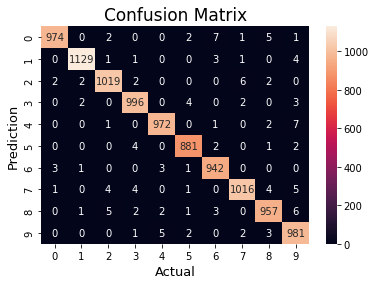

In [357]:
calculate_confusion_matrix(model, test_loader, device)

# y_pred, y_true = get_preds(model, test_loader, device)

In [350]:
# from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

In [359]:
# classifier.eval()
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [231]:
# save_model(classifier, save_path = save_path, name = 'test', name2 = 'classifier_model.pt')